# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Final Project Group H: Impacts of COVID-19 in Education

**Harvard University Extension School**<br/>
**Fall 2021**<br/>
**Team Members**: Jaqueline Garcia-Yi, Yao Zhang, and Andrea Coda

<hr style="height:2.4pt">

## Summary and background<a name="introduction"></a>



<div class='exercise-r'>

### Summary<a name="summary"></a>
    
</div>


Our refined research question is: What is the impact of COVID on primary education completion rates worldwide?

We are working with two types of databases, which consist on:   
- 1603 educational indicators from UNESCO (named Sustainable Development Goals, SDGs)   
- 20 economic indicators from the World Bank   

However, both databases include: 
- an unequal number of countries (or number of observations) per indicator  
- an unequal number of years per indicator   
- multiple and unequal number of NAs per indicator  
       
After an extensive and systematic data cleaning, restructuring, matching countries and years among indicators, identification and implementation of procedures for filling remaining NAs, and data visualization, we selected as outcome variable:    
- Primary education completion % (in 2019)   
   
And the following predictors variables (as time lagged and the same year variables):   
- Annual GDP growth % (in 2011, 2015, and 2019)  
- GDP per capita USD (in 2011, 2015, and 2019)  
- Annual inflation % (in 2011, 2015, and 2019)  
- Mobile per 100 people (in 2011, 2015, and 2019)   
- Annual population growth % (in 2011, 2015, and 2019)   

In general, the main steps we are following for answering our research question include:   
- using pre-COVID data (2011-2019) to build a baseline model to predict 2020 (this prediction will be the equivalent to what would have happened without COVID)    
- calculating the gap between our 2020 model prediction and what actually happened with COVID (this means the difference between our 2020 prediction and the actual/real 2020 data). We will consider this gap as the impact of COVID.     

Our main (strong) assumptions are:
-	Only the selected economic predictors influence our outcome variable (primary completion rates)
-	The observed gap between our model and the actual/real data is only/mainly due to Covid. 
-	The effects of COVID on education are already evident one year after the pandemic started.
-   The different local measures in place to mitigate the impact of school closures and student drop-outs in 2020 had similar effects across the globe (and do not need to be included in our models). 
   
Regarding the last main assumption, we do not have data about local measures, but tried to account for this (and other missing information) by including dummy variables for (a) geographic location and (b) development status of the countries, both of which partially captured relevant missing information.

We ran the following regression models:
- (Standard) linear regression
- Lasso linear regression (with alpha tuned using cross validation)
- k-NN regression (with k tuned using cross validation)
- Single decision tree (with depth tuned using cross validation)
- Bagging decision tree regression (with depth tuned using cross validation)
- Random forest regression (with depth tuned using cross validation)
- Adaboost regression (with depth tuned and optimal number of estimators)

For the regression models, we followed the same procedures as in class to fit the models, tune the models, estimate accuracies, calculate feature importances, and predict using the models. The main difference was that in class we focused on classification models, while we used regression models for this project. 
   
Despite the small sample size after cleaning the data (83 countries), the test accuracy of all the models was medium to relatively high (between 0.63 to 0.81), while the difference between the predictions of the models for 2020 and the actual value of primary completion rate for 2020 was between -0.27 and 5.39 percent.
    
As expected, Adaboost provided the best test accuracy (0.81) in comparison to the other models (followed by the random forest, bagging, k-NN, and single decision tree). The difference between the prediction for 2020 of the Adaboost model and the actual 2020 value for primary completion rate was less than 1 percent (-0.27 percent), suggesting that the impact of Covid is (still) not evident for this educational indicator.  
  
Importantly, the (standard and lasso) linear models also provided high test accuracies, but violated the homoskedasticity assumption, and therefore, they are not suitable for prediction (see Section VI of the Notebook for a summary of all the model results). 
  
The paper (submitted with this Notebook) provides: (a) a discussion on the different models; (b) a short literature review and context, allowing us to elaborate on possible explanations on why the effect of Covid may not be still evident on primary completion rates worldwide; and (c) suggestions for the way forward regarding research in this particular topic. 


<div class='exercise-r'>

### General background on the data used in the project<a name="about"></a>
    
</div>


The original final project topic H is “UNICEF Data Set: Impact of Covid-19 on Secondary And Primary School Education”. However, the UNICEF dataset [(link here)](https://data.unicef.org/resources/dataset/secondary-education-data/) provided for the analysis only includes data pre-Covid (from 2019 or before) and does not include data post-Covid (from 2020), making it not suitable for an evaluation of the impacts of the pandemic. The World Health Organization declared the Covid outbreak as pandemic on March 11, 2020 [(link here)](https://pubmed.ncbi.nlm.nih.gov/32191675/), with the first official case going back to November 17, 2019 [(link here)](https://www.livescience.com/first-case-coronavirus-found.html). Therefore, we identified and used for this project a comprehensive UNESCO dataset on educational indicators [(link here)](https://apiportal.uis.unesco.org/bddshttps:/apiportal.uis.unesco.org/bdds) and a World Bank dataset on economic indicators [(link here)](https://databank.worldbank.org/home.aspx), which included data before and after Covid. The main characteristics of both datasets are provided in the table below:


|Characteristic	| UNESCO dataset	| World Bank dataset |
|:---------------|:-----------------|:-------------------|
|Number of indicators |	1609 SDG-related educational indicators $^{(a)}$	| 20 economic indicators |
|Number of countries $^{(b)}$ |	241	| 217 |
|Years of data |	1970-2020 |	2011-2020 |


*Table footnotes:*   
$^{(a)}$ SDG stands for “Sustainable Development Goal”. The UN has identified 17 SDGs, which humanity needs to achieve to guarantee sustainable progress for all [(link here)](https://sdgs.un.org/goals). UNESCO is the custodian agency of SDG 4 or SDG on “Quality Education”. UNESCO uses this data to measure progress towards the achievement of that specific goal.  
$^{(b)}$  The number of sovereign countries, which are recognized by UN and Members States of UN, is 193 [(link here)](https://www.un.org/en/about-us). However, UNESCO and World Bank datasets also include as “countries” currently not existing countries and some territorial dependencies of other countries.

<a id="contents"></a>

## NOTEBOOK CONTENTS

   
[Summary and background](#introduction)  
&emsp;&nbsp;[Summary](#summary)  
&emsp;&nbsp;[General background on the data used in the project](#about)  
   
[I.&ensp; Format the notebook and import libraries](#paragraph0)   

    
[II.&ensp;Load files and describe the data](#paragraph1)   

    
[III. Clean and reconcile the data](#paragraph2)   
&emsp;&nbsp;[3.1 Educational/SDG files (outcome variables)](#paragraph3)   
&emsp;&nbsp;[3.2 Economic files (predictor variables)](#paragraph4)   
&emsp;&nbsp;[3.3 Combine outcome and predictor files](#paragraph5)   

    
[IV. Explore and visualize data (cleaned output and predictor variables)](#paragraph6)   
&emsp;&nbsp;[4.1 Per outcome variable and year](#paragraph7)   
&emsp;&nbsp;[4.2 Per predictor variable and year](#paragraph8)   
&emsp;&nbsp;[4.3 Selection of outcome and predictor variables](#paragraph9)   
&emsp;&nbsp;[4.4 Visualization of outcome versus predictor variables](#paragraph10)   
&emsp;&nbsp;[4.5 Correlation between outcome and predictor variables](#paragraph11)   
&emsp;&nbsp;[4.6 Correlation between predictor variables](#paragraph12)    

   
[V. Build the models](#paragraph13)   
&emsp;&nbsp;[5.1 Pre-process data](#paragraph14)   
&emsp;&nbsp;[5.2 (Standard) linear regression](#paragraph15)   
&emsp;&nbsp;[5.3 Lasso linear regression (with alpha tuned using cross validation)](#paragraph16)  
&emsp;&nbsp;[5.4 k-NN regression (with k tuned using cross validation)](#kNN)   
&emsp;&nbsp;[5.5 Single decision tree (with depth tuned using cross validation)](#paragraph17)    
&emsp;&nbsp;[5.6 Bagging decision tree regression (with depth tuned using cross validation)](#bagging)     
&emsp;&nbsp;[5.7 Random forest tree regression (with depth tuned using cross validation)](#random_forest)    
&emsp;&nbsp;[5.8 Adaboost regression (with depth tuned and optimal number of estimators)](#Adaboost)    
    
[VI. Summary of results of the different models](#paragraph18)   


<hr style="height:2pt">

## NOTEBOOK OF FINAL PROJECT


<div class='exercise-r'>

### I. Format the notebook and import libraries<a name="paragraph0"></a>
    
</div>


[Return to contents](#contents)  

**Description of this section:**    
This section includes the code used by CSCI-109A for formating notebooks and the commands for importing the libraries\packages that we used for our work.

In [1]:
# RUN THIS CELL (Style used by CSCI 109A course)
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import resample
from sklearn.inspection import permutation_importance

%matplotlib inline


<div class='exercise-r'>

### II. Load Files and Describe the Data<a name="paragraph1"></a>
    
</div>


[Return to contents](#contents)  

**Description of this section:**    
This section includes the code for loading/reading the data files and for providing a general description/summary of the data that we used for our work.   
    
     
We loaded two types of data:   
a) Educational outcomes from UNESCO corresponding to three files:   
- the raw data for 1609 different economic indicators related to the Sustainable Development Goals (SDG) and covering 241 countries (period of time 1970-2020)
- the full name of each 1609 economic indicator based on the codes provided in the raw data   
- the full name of each of the 241 countries based on the codes provided in the raw data  

b) Economic predictors from the World Bank (WB) corresponding to one file including 20 economic indicators and covering 217 (period of time 2011-2020)   


We provide here:
- each file shape (number of rows and columns)   
- each file summary statistics  
- each file first rows  

In [3]:
####
#Read/Load the files
####

#Supress warnings while importing, as columns include a combination of text and numbers
import warnings
warnings.filterwarnings("ignore")

#SDG data 
sdg_data_country=pd.read_csv("SDG_DATA_NATIONAL.csv")
print("\033[1m"+f"\n\nThe SDG data file has {sdg_data_country.shape[0]} rows and {sdg_data_country.shape[1]} columns"+
      " and includes the following:\n"+ "\033[0m")
print("\033[1m"+"(a) Summary statistics:"+ "\033[0m")
print(sdg_data_country.describe())
print("\033[1m"+"\n(b) First rows of the file:"+ "\033[0m")
print(sdg_data_country.head())

#SDG codes
sdg_names=pd.read_csv("SDG_LABEL.csv")
print("\033[1m"+f"\n\nThe SDG codes file has {sdg_names.shape[0]} rows and {sdg_names.shape[1]} columns"+
      " and includes the following:\n"+ "\033[0m")
print("\033[1m"+"(a) Summary statistics:"+ "\033[0m")
print(sdg_names.describe())
print("\033[1m"+"\n(b) First rows of the file:"+ "\033[0m")
print(sdg_names.head())

#Country codes
country_names=pd.read_csv("SDG_COUNTRY.csv")
print("\033[1m"+f"The country codes file has {country_names.shape[0]} rows and {country_names.shape[1]} columns"+ 
      " and includes the following:\n"+ "\033[0m")
print("\033[1m"+"(a) Summary statistics:"+ "\033[0m")
print(country_names.describe())
print("\033[1m"+"\n(b) First rows of the file:"+ "\033[0m")
print(country_names.head())


#Economic World Bank data
econ_data=pd.read_csv("WorldBank_Econ_Indicators.csv")
print("\033[1m"+f"\n\nThe economic data file has {econ_data.shape[0]} rows and {econ_data.shape[1]} columns"+
      " and includes the following:\n"+ "\033[0m")
print("\033[1m"+"(a) Summary statistics:"+ "\033[0m")
print(econ_data.describe())
print("\033[1m"+"\n(b) First rows of the file:"+ "\033[0m")
print(econ_data.head())




The SDG data file has 788395 rows and 6 columns and includes the following:

(a) Summary statistics:
                YEAR         VALUE
count  788395.000000  7.883950e+05
mean     2008.212801  1.314168e+04
std         9.926282  7.488746e+05
min      1970.000000  0.000000e+00
25%      2004.000000  9.841200e-01
50%      2011.000000  9.730000e+00
75%      2015.000000  5.967610e+01
max      2021.000000  2.871707e+08

(b) First rows of the file:
             INDICATOR_ID COUNTRY_ID  YEAR  VALUE MAGNITUDE QUALIFIER
0  ADMI.ENDOFLOWERSEC.MAT        ABW  2014    0.0       NaN       NaN
1  ADMI.ENDOFLOWERSEC.MAT        ABW  2015    0.0       NaN       NaN
2  ADMI.ENDOFLOWERSEC.MAT        ABW  2016    0.0       NaN       NaN
3  ADMI.ENDOFLOWERSEC.MAT        ABW  2017    0.0       NaN       NaN
4  ADMI.ENDOFLOWERSEC.MAT        ABW  2018    0.0       NaN       NaN


The SDG codes file has 1609 rows and 2 columns and includes the following:

(a) Summary statistics:
                        INDICAT

<div class='exercise-r'>

### III. Clean and reconcile the data<a name="paragraph2"></a>

    
</div>



**Description of this section:**    

The data cleaning and reconciliation was extensive as both datasets include an unequal number of countries and years of data per indicator. Besides, they include multiple NAs unequally distributed among indicators, countries, and years of data. In general, our data cleaning and reconciliation procedure focused on identifying those indicators with the minimum number of NAs.


The code in this section covers:
   
***a) For the educational outcome data:***
- Replacing the 1609 educational outcome codes and 241 country codes by their actual names
- Creating a dataframe per each of the 1609 educational outcome and restructure the data (countries as rows and years as columns)
- Dropping educational outcomes without data from 2011-2020 (as the economic data only include those years)
- Dropping educational outcomes with high number of NAs
   
***b) For the economic predictors data:***
- Creating a dataframe per each of the 20 economic predictors
   
***c) For both educational and economic data:***
- Keeping only the countries included in both the educational outcomes and economic predictors data   
- From the remaining countries, identifying if countries without data and dropping educational outcomes and economic predictors with more than one country with (full) missing data           
- Dropping one country with (full) missing data from both the educational outcome and economic predictors data
- Identifying the countries with half or more missing data (for the period 2011-2020, it means 5 out 10 years), as interpolation of high number of missing data will be not suitable 
- Dropping educational outcomes and economic predictors with more than one country with half or more missing data 
- Dropping one country with (half) missing data from both the educational outcomes and economic predictors data
- Interpolating missing data per country for 5 economic predictors (based on visualization, we decided missing data to be equal to previous year data or next year data when previous year was not available)

***Cleaned educational outcomes and economic predictors data for further analysis:***
- Educational outcomes: 3 educational outcomes (with 99 countries and data from 2011-2020 each)
- Economic predictors: 7 economic predictors (with 99 countries and data from 2011-2020 each)


### 3.1 Educational/SDG files (outcome variables)<a name="paragraph3"></a>


[Return to contents](#contents)  

In [4]:
####
#Change codes by actual values in sdg files
####

#Create dictionary with country codes
country_dict = {}
for i in range(len(country_names)):
    country_dict[country_names["COUNTRY_ID"][i]] = country_names["COUNTRY_NAME_EN"][i]

#Create dictionary with SDG codes
sdg_dict = {}
for i in range(len(sdg_names)):
    sdg_dict[sdg_names["INDICATOR_ID"][i]] = sdg_names["INDICATOR_LABEL_EN"][i]
    
#Include country names from country codes
sdg_data_country["COUNTRY_NAME_EN"] = sdg_data_country["COUNTRY_ID"]
sdg_data_country["COUNTRY_NAME_EN"].replace(country_dict, inplace=True)

#Include sdg names from sdg codes
sdg_data_country["INDICATOR_LABEL_EN"] = sdg_data_country["INDICATOR_ID"]
sdg_data_country["INDICATOR_LABEL_EN"].replace(sdg_dict, inplace=True)


####
#Replace not allowed text characters in sdg files
####
sdg_names["INDICATOR_ID"] = sdg_names["INDICATOR_ID"].str.replace('.','_',regex=True)
sdg_data_country["INDICATOR_ID"] = sdg_data_country["INDICATOR_ID"].str.replace('.','_',regex=True)

#Print results
print(f"The modified SDG data file has {sdg_data_country.shape[0]} rows and {sdg_data_country.shape[1]} columns.")


The modified SDG data file has 788395 rows and 8 columns.


In [5]:
####
#Create a dataframe per each of the 1609 SDG variables (educational variables) and restructure data (rows = years) 
####

#Create list of SDG names
sdg_country_list = sdg_names["INDICATOR_LABEL_EN"]

#Create emptly lists for storing results
sdg_country_df_list = [[] for i in range(len(sdg_country_list))]

#Iterate to create a country dataframe per sdg
for i in range(len(sdg_country_list)):

    #Restructure country data
    data_country_per_sdg = sdg_data_country[sdg_data_country["INDICATOR_LABEL_EN"]==sdg_country_list[i]]
    data_country_pivot = data_country_per_sdg.pivot(index='YEAR', columns='COUNTRY_NAME_EN', values='VALUE')

    #Append data to emptly list
    sdg_country_df_list[i].append(data_country_pivot)

#Print results
print(f"Number of SDG dataframes: {len(sdg_country_df_list)}")


Number of SDG dataframes: 1609


In [6]:
####
#Identify SDG variables with data from 2011 to 2020
####

#Create emptly lists to store results
sdg_country_list_years=[]
sdg_country_df_list_years=[]

#Iterate to identify sdg variables with data from 2011 to 2020
for i in range(len(sdg_country_list)):
    
    #Dataframe of the sdg variable
    sdg_df=sdg_country_df_list[i][0]
    
    #Create list of years
    year_list=list((sdg_country_df_list[i][0]).index)
    
    #Identify min and max year
    if sdg_df.empty==False: #To exclude SDG codes which did not have SDG data
        min_year=min(year_list)
        max_year=max(year_list)
        
        #Select variables with min_year<=2011 and max_year==2020
        if min_year<=2011 and max_year==2020:
            sdg_country_list_years.append(sdg_country_list[i])
            sdg_country_df_list_years.append(sdg_country_df_list[i][0])

#Print results
print("The number of SDG variables is", len(sdg_country_list), 
      ", while the number of SDG variables including data between 2011 and 2020 is", len(sdg_country_list_years))


The number of SDG variables is 1609 , while the number of SDG variables including data between 2011 and 2020 is 813


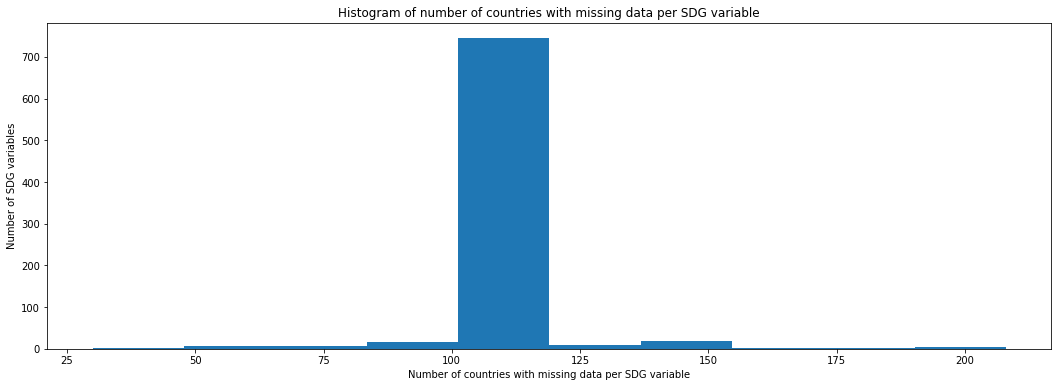

The total number of SDG variables including data between 2011 and 2020 is 813
, while based on the histogram the number of SDG variables with fewer than 50 countries with missing data is 3

Therefore, the selected SDG variables (to be potentially used as outcome variables) are:
['Completion rate, primary education, both sexes (%)', 'Completion rate, primary education, female (%)', 'Completion rate, primary education, male (%)']


In [7]:
####
#Identify missing data by country per SDG variable
####

#Threshold for missing data
n=50

#Create emptly dataframes to store results
sdg_missing_countries_list=[]
sdg_missing_n_countries=[]
sdg_clean_list=[]
sdg_clean_df_list=[]

#Iterate to identify missing data by country per sdg variable
for i in range(len(sdg_country_list_years)):

    #Dataframe with the number of years with missing data per country
    sdg_missing = pd.DataFrame((sdg_country_df_list_years[i]).isnull().sum())
    
    #Number of countries with missing data 
    sdg_missing_countries=sdg_missing[sdg_missing[0]>0]
    n_countries=len(sdg_missing_countries)
    sdg_missing_n_countries.append(n_countries)
    
    #SDG variables with missing data below the threshold
    if n_countries<=n:
        #Append results
        sdg_missing_countries_list.append(sdg_missing_countries)
        sdg_clean_df_list.append(sdg_country_df_list_years[i])
        sdg_clean_list.append(sdg_country_list_years[i])

#Plot number of countries with missing data per sdg variable
plt.figure(figsize=(18,6))
plt.hist(sdg_missing_n_countries)
plt.title("Histogram of number of countries with missing data per SDG variable")
plt.xlabel("Number of countries with missing data per SDG variable")
plt.ylabel("Number of SDG variables")
plt.show()

#Print results
print("The total number of SDG variables including data between 2011 and 2020 is", len(sdg_country_list_years)) 
print(f", while based on the histogram the number of SDG variables with fewer than {n} countries with missing data is",
      len(sdg_clean_list))
print("\nTherefore, the selected SDG variables (to be potentially used as outcome variables) are:")
print(sdg_clean_list)


In [8]:
####
#From the 3 pre-selected SDG variables, drop countries with missing data and drop years <2011
####

#Create emptly list to store results
sdg_df_no_missing=[]

#Iterate to drop countries and years per dataframe
for i in range(len(sdg_clean_list)):
    sdg_df=sdg_clean_df_list[i]
    countries=list(sdg_missing_countries_list[i].index)
    years=list(sdg_df.index)
    
    #Drop countries with missing data
    sdg_df.drop(countries, axis=1, inplace=True)
    
    #Drop years <2011
    for j in years:
        if j<2011:
            sdg_df.drop(j, axis=0, inplace=True)
    sdg_df_no_missing.append(sdg_df)

#Print results
print(f"\nEach of the cleaned dataframes of the selected SDG variables has {sdg_df_no_missing[0].shape[0]} rows" + 
      f" and {sdg_df_no_missing[0].shape[1]} columns.")



Each of the cleaned dataframes of the selected SDG variables has 10 rows and 99 columns.


### 3.2 Economic Files (Predictors)<a name="paragraph4"></a>


[Return to contents](#contents)  

In [9]:
####
#Create a dataframe per each of the 20 economic variables
####

#Create a list of economic variable names
econ_list = np.unique(list(econ_data["Series Name"]))

#Create emptly lists for storing results
econ_df_list = [[] for i in range(len(econ_list))]

#Iterate to create a dataframe per economic variable
for i in range(len(econ_list)):
    
    #Filter data per economic variable
    data_per_econ=econ_data[econ_data["Series Name"]==econ_list[i]]

    #Append data to emptly lists
    econ_df_list[i].append(data_per_econ)

####
#Reshape the dataframes of each of the 20 economic variables
####

#Create emptly list to store results
econ_df_list2=[]

#Iterate to clean and reshape each dataframe per economic variable
for i in range(len(econ_list)):
    
    #Select the dataframe of the economic variable
    a=econ_df_list[i][0]
    
    #Drop not needed columns
    a.drop(["Series Name", "Series Code", "Country Code"], axis=1, inplace=True)
    
    #Reshape the dataframe to obtain countries in columns and years in rows
    b=a.T
    
    #Rename columns with country names
    columns_name=list(b.columns)
    country_name=list(b.loc["Country Name"])
    dict_names = dict(zip(columns_name, country_name))
    b.rename(columns=dict_names, inplace=True)
    
    #Drop auxilary row
    b.drop("Country Name", axis=0, inplace=True)
    
    #Store results
    econ_df_list2.append(b)

#Print results
print(f"Number of economic dataframes: {len(econ_df_list2)}")


Number of economic dataframes: 20


### 3.3 Combine outcome and predictor files<a name="paragraph5"></a>


[Return to contents](#contents)  

In [10]:
####
#Identify countries that are both in the outcome and predictor variables 
####

#List of countries in the sdg variables
lst_country_sdg=list(sdg_df_no_missing[0].columns)

#List of countries in the economic variables
lst_country_econ=list(econ_df_list2[0].columns)

#Function for finding the countries in both type of variables (intersection)
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

#Run the function
lst_countries_incl=intersection(lst_country_sdg, lst_country_econ)

####
#Exclude countries that are not in the intersection list (from SDG variables and economic variables)
####
#From the sdg variables
sdg_df_filtered=[]
for i in range(len(sdg_df_no_missing)):
    sdg_df_filtered.append((sdg_df_no_missing[i])[lst_countries_incl])
    
#From the economic variables
econ_df_filtered=[]
for i in range(len(econ_df_list2)):
    econ_df_filtered.append((econ_df_list2[i])[lst_countries_incl])


#Print results
print("The number of countries that are in both the SDG variables and economic variables are", len(lst_countries_incl))
print("\nThese countries are:")
print(lst_countries_incl)

The number of countries that are in both the SDG variables and economic variables are 85

These countries are:
['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Cuba', 'Djibouti', 'Dominican Republic', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Papua New Guinea', 'Peru', 'Philippines', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan

In [11]:
####
## Identify countries without data per economic variable
####

#Total number of years of data
n_years=len(econ_df_filtered[0])

#Create emptly list for storing results
econ_nas=[]

#Iterate to identify countries without data per economic variable
for i in range(len(econ_df_filtered)):
    #Number of years without data per country and economic variable
    df_econ_na=econ_df_filtered[i].isnull().sum()
    #Identify countries with 10 years of missing data
    df_econ_na2=pd.DataFrame(df_econ_na[df_econ_na==n_years]).T
    #Place the countries with 10 years of missing data in a list
    df_econ_na3=list(df_econ_na2.columns)
    #Store the list
    econ_nas.append(df_econ_na3)

#Print the results
print("\033[1m"+f"The countries with {n_years} years of missing data (2011-2020) per economic variable are:"+ "\033[0m")

for i in range(len(econ_nas)):
    print()
    print(econ_list[i])
    print(econ_nas[i])


The countries with 10 years of missing data (2011-2020) per economic variable are:

Agriculture, forestry, and fishing, value added (% of GDP)
['Barbados', 'Somalia', 'Syrian Arab Republic']

Exports of goods and services (% of GDP)
['Afghanistan', 'Guyana', 'Malawi', 'Papua New Guinea', 'Sao Tome and Principe', 'Syrian Arab Republic', 'Trinidad and Tobago']

Foreign direct investment, net (BoP, current US$)
['Central African Republic', 'Chad', 'Cuba', 'Equatorial Guinea', 'Somalia', 'Syrian Arab Republic', 'Turkmenistan']

GDP (current US$)
['Syrian Arab Republic']

GDP growth (annual %)
['Syrian Arab Republic']

GDP per capita (current US$)
['Syrian Arab Republic']

GNI per capita, Atlas method (current US$)
['Syrian Arab Republic']

GNI per capita, PPP (current international $)
['Cuba', 'Syrian Arab Republic']

GNI, Atlas method (current US$)
['Syrian Arab Republic']

GNI, PPP (current international $)
['Cuba', 'Syrian Arab Republic']

Imports of goods and services (% of GDP)
['Afgh

In [12]:
####
## Identify economic variables with none or only one country with 10 years of missing data
####

#Emptly list to store results
list_missing_country=[]
list_incl=[]
econ_clean_list=[]
econ_df_filtered2=[]

#Iterate to create a list of the index numbers of the economic variables with none or only one country 
#with 10 years of missing data
for i in range(len(econ_nas)):
    if len(econ_nas[i])<=1:
        list_incl.append(i)
        list_missing_country.append(econ_nas[i])

#Iterate to include only the economic variables that are in the list of index numbers
for i in list_incl:
    econ_clean_list.append(econ_list[i])
    econ_df_filtered2.append(econ_df_filtered[i])

#Name of the country with 10 years of missing data from the included economic variables
country_10_name=np.unique([item for sublist in list_missing_country for item in sublist])

####
## Delete the only country with 10 years of missing data from SDG variables and economic variables
####

#Create copy of files
sdg_df_final=sdg_df_filtered.copy()
econ_df_final=econ_df_filtered2.copy()

#Iterate for dropping the country from the sdg variables
for i in range(len(sdg_df_filtered)):
    #Drop 'Syrian Arab Republic'
    sdg_df_final[i].drop(country_10_name, axis=1, inplace=True)

#Iterate for dropping the country from the economic variables
for i in range(len(econ_df_filtered2)):
    #Drop 'Syrian Arab Republic'
    econ_df_final[i].drop(country_10_name, axis=1, inplace=True)

#Print results
print(f"The number of economic variables are {len(econ_list)}"+ ", while the number of economic variables "+
      f"with none or only one country with {n_years} years  of missing data are {len(econ_clean_list)}")
print(f"\nThe economic variables with none or only one country with {n_years} years of missing data are:")
print(econ_clean_list)
print(f"\nIn these economic variables, the country with {n_years} of missing data is:")
print(country_10_name)

The number of economic variables are 20, while the number of economic variables with none or only one country with 10 years  of missing data are 9

The economic variables with none or only one country with 10 years of missing data are:
['GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'GNI per capita, Atlas method (current US$)', 'GNI, Atlas method (current US$)', 'Inflation, GDP deflator (annual %)', 'Mobile cellular subscriptions (per 100 people)', 'Population growth (annual %)', 'Population, total']

In these economic variables, the country with 10 of missing data is:
['Syrian Arab Republic']


In [13]:
####
## Identify number of years of missing data per country in the final sdg and economic variable
####

#Missing data per sdg variable
print("\n"+"\033[1m"+"Missing data in SDG variables:"+ "\033[0m"+"\n")
for i in range(len(sdg_df_final)):
    print(sdg_clean_list[i])
    print(sdg_df_final[i].isnull().sum().sum())

#Missing data per economic variable
print("\n"+"\033[1m"+"\nNumber of years of missing data per country in economic variables:"+ "\033[0m"+"\n")
for i in range(len(econ_df_final)):
    print("\n"+econ_clean_list[i])
    econ_df_na=econ_df_final[i].isnull().sum()
    econ_df_na2=pd.DataFrame(econ_df_na[econ_df_na>0])
    print(econ_df_na2.rename(columns={0:"Number of years with missing data"}))
    
    


Missing data in SDG variables:

Completion rate, primary education, both sexes (%)
0
Completion rate, primary education, female (%)
0
Completion rate, primary education, male (%)
0


Number of years of missing data per country in economic variables:


GDP (current US$)
              Number of years with missing data
Cuba                                          1
Somalia                                       2
South Sudan                                   5
Turkmenistan                                  1

GDP growth (annual %)
              Number of years with missing data
Cuba                                          1
Djibouti                                      3
Somalia                                       3
South Sudan                                   5
Turkmenistan                                  1

GDP per capita (current US$)
              Number of years with missing data
Cuba                                          1
Somalia                                       2
Sout

In [14]:
####
## Dealing with missing data in the economic variables:
## Criterium for inclusion of economic indicators = no more than one third of data missing per country (<=3 years missing data)
####

#Drop "GNI per capita, Atlas method (current US$)" and "GNI, Atlas method (current US$)" from economic variables
del econ_df_final[3:5]
del econ_clean_list[3:5]

#Iterate for dropping the "South Sudan" from the sdg variables
for i in range(len(sdg_df_final)):
    #Drop "South Sudan"
    sdg_df_final[i].drop("South Sudan", axis=1, inplace=True)

#Iterate for dropping the "South Sudan" from the economic variables
for i in range(len(econ_df_final)):
    #Drop "South Sudan"
    econ_df_final[i].drop("South Sudan", axis=1, inplace=True)

#Print results
print(f"The number of economic variables with none or only one country with {n_years} years of missing data were")
print(f"{len(econ_clean_list)+2}. The current number of economic variables after cleaning is {len(econ_clean_list)}")
    
#New missing data per economic variable
print("\n"+"\033[1m"+"\nNumber of years of missing data per country in economic variables (all below 3 years):"+ "\033[0m"+"\n")
missing_country_names=[]
for i in range(len(econ_df_final)):
    print("\n"+econ_clean_list[i])
    econ_df_na=econ_df_final[i].isnull().sum()
    econ_df_na2=pd.DataFrame(econ_df_na[econ_df_na>0])
    missing_country_names.append(econ_df_na2.index.tolist())
    print(econ_df_na2.rename(columns={0:"Number of years with missing data"}))
    


The number of economic variables with none or only one country with 10 years of missing data were
9. The current number of economic variables after cleaning is 7


Number of years of missing data per country in economic variables (all below 3 years):


GDP (current US$)
              Number of years with missing data
Cuba                                          1
Somalia                                       2
Turkmenistan                                  1

GDP growth (annual %)
              Number of years with missing data
Cuba                                          1
Djibouti                                      3
Somalia                                       3
Turkmenistan                                  1

GDP per capita (current US$)
              Number of years with missing data
Cuba                                          1
Somalia                                       2
Turkmenistan                                  1

Inflation, GDP deflator (annual %)
              Nu

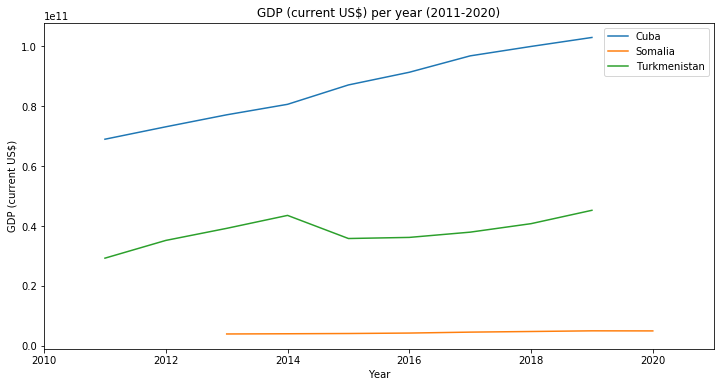

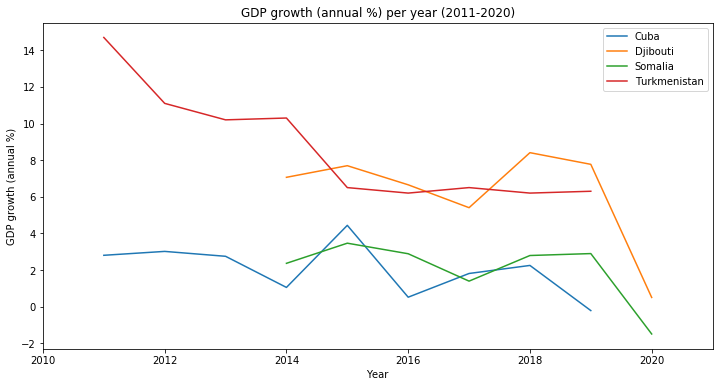

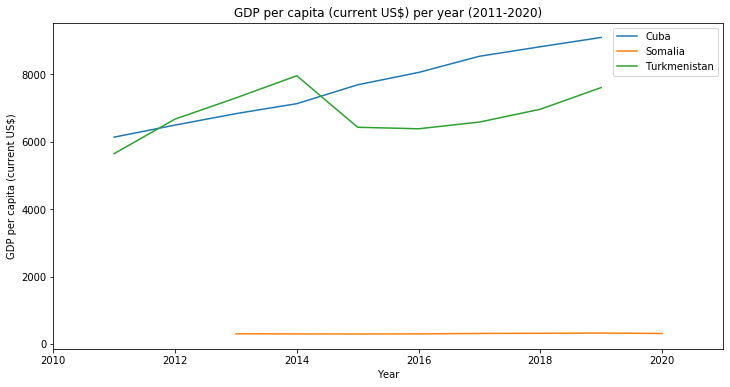

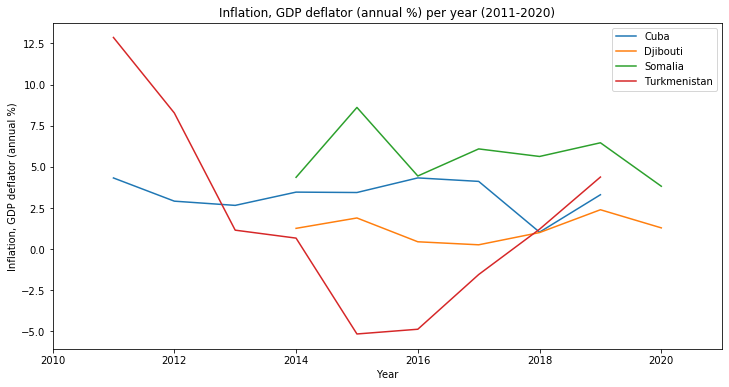

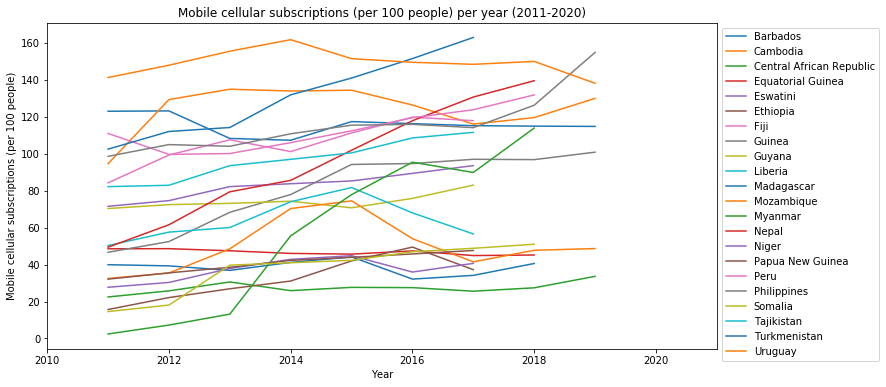

In [15]:
####
## Dealing with missing data in the economic variable:
## Visualize countries per economic variable
####

#Visualize countries with NA per economic variable
for i in range(0,5):
    a=econ_df_final[i]
    plt.figure(figsize=(12,6))
    for j in range(len(missing_country_names[i])):
        plt.plot([int(i) for i in list(a.index)], a[missing_country_names[i][j]], label=missing_country_names[i][j])
    plt.title(f"{econ_clean_list[i]} per year (2011-2020)")
    plt.xlabel("Year")
    plt.xlim([2010,2021])
    plt.ylabel(f"{econ_clean_list[i]}")
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()


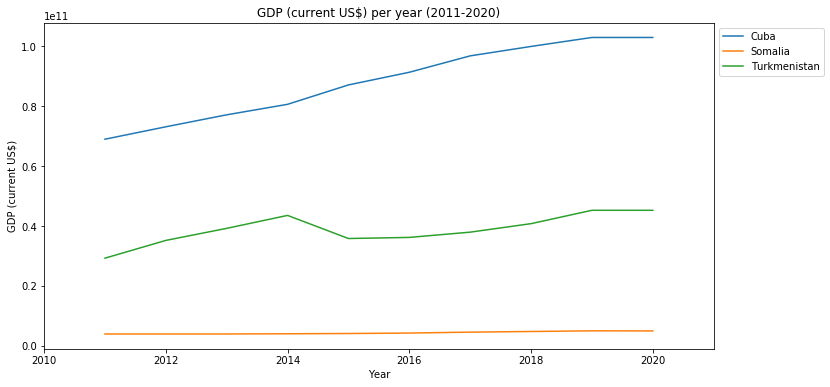

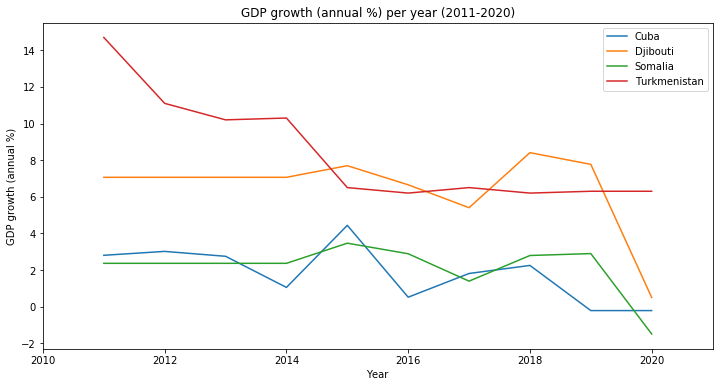

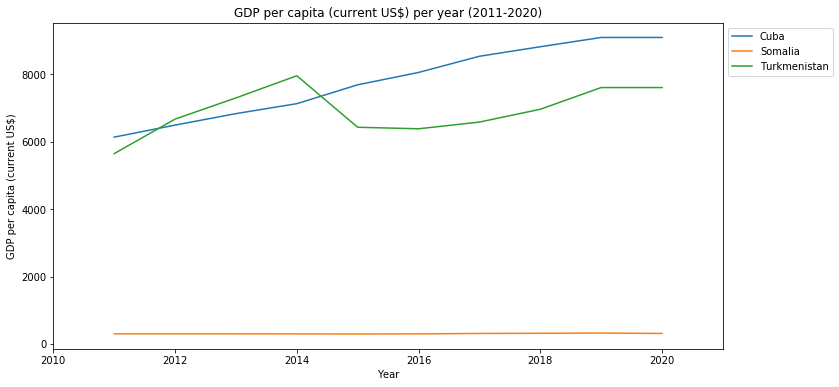

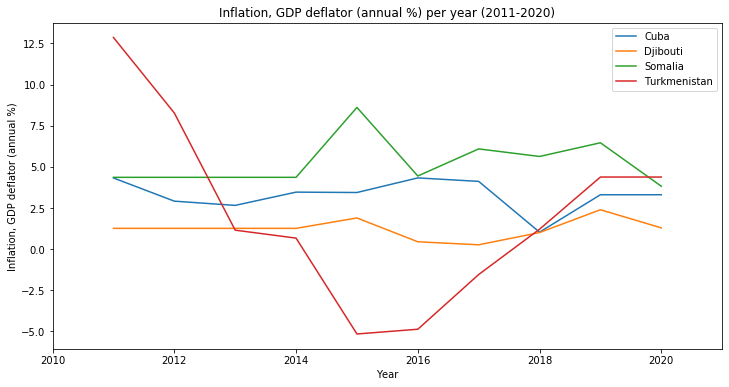

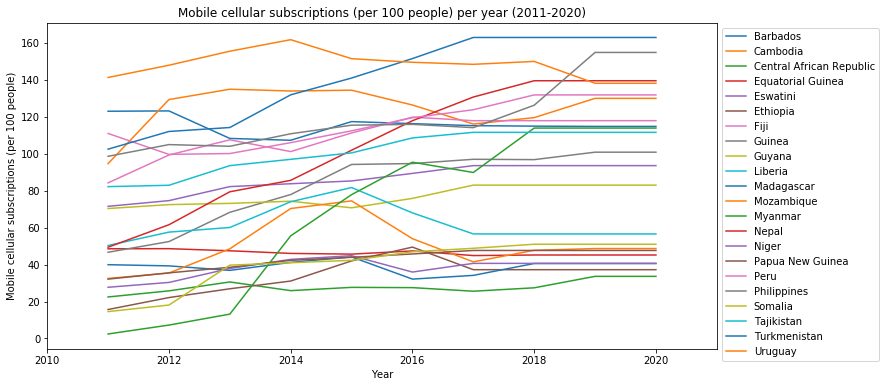

In [16]:
####
## Dealing with missing data in the economic variables:
## Replace NA with the previous year data (or next year value when previous year not available)
####

#Fill NA with previous year data per country
for i in range(0,5):
    #Fill NA with the previous year value
    econ_df_final[i].fillna(method='ffill', inplace=True)
    #Fill NA with the next year value (when previous not available)
    econ_df_final[i].fillna(method='bfill', inplace=True)
    
#Visualize countries per economic variable after filling NAs
for i in range(0,5):
    a=econ_df_final[i]
    plt.figure(figsize=(12,6))
    for j in range(len(missing_country_names[i])):
        plt.plot([int(i) for i in list(a.index)], a[missing_country_names[i][j]], label=missing_country_names[i][j])
    plt.title(f"{econ_clean_list[i]} per year (2011-2020)")
    plt.xlabel("Year")
    plt.xlim([2010,2021])
    plt.ylabel(f"{econ_clean_list[i]}")
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()

<div class='exercise-r'>

### IV. Explore and visualize data (cleaned output and predictor variables)<a name="paragraph6"></a>
    
</div>

**Description of this section:**    
   
This section on exploring and visualizing data includes:  
- Boxplots per year for visualizing the time trend of each of the outcome and predictor variables  
- Selection of outcome and predictor variables (to be used in the regression models)   
- Scatter plots of outcome versus predictor variables   
- (Pearson) correlation of outcome versus predictor variables   
- Correlation heatmap of predictor variables   

### 4.1 Per outcome variable and year<a name="paragraph7"></a>


[Return to contents](#contents)  



Descriptive statistics of SDG variable: Completion rate, primary education, both sexes (%)

YEAR         2011        2012        2013        2014        2015        2016  \
count   83.000000   83.000000   83.000000   83.000000   83.000000   83.000000   
mean    73.508976   74.449495   75.186945   76.137765   76.652008   77.433770   
std     23.987208   23.592684   23.076669   22.665896   22.303227   21.914100   
min     19.400000   19.800000   20.400000   26.300000   21.400000   22.000000   
25%     57.850000   60.451445   62.250000   61.093625   63.100000   63.900000   
50%     75.221540   77.200010   78.899990   80.012130   79.900000   82.500000   
75%     96.950000   97.174995   97.247975   97.349995   97.289995   97.619995   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

YEAR         2017        2018        2019        2020  
count   83.000000   83.000000   83.000000   83.000000  
mean    78.040034   78.475529   78.831772   79.774516  
std     

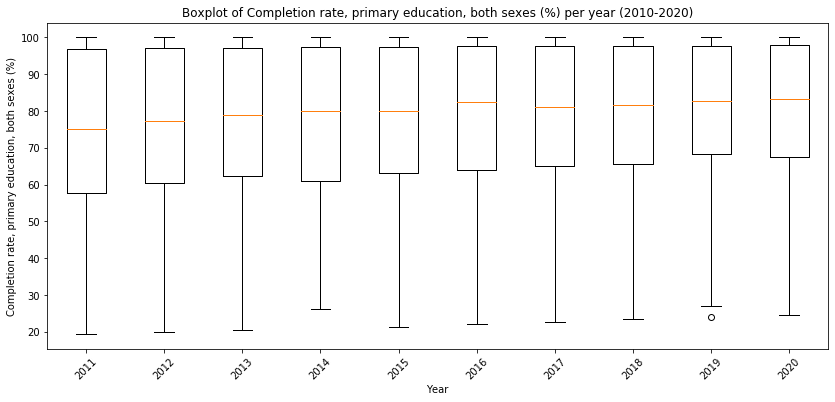



Descriptive statistics of SDG variable: Completion rate, primary education, female (%)

YEAR         2011        2012        2013        2014        2015        2016  \
count   83.000000   83.000000   83.000000   83.000000   83.000000   83.000000   
mean    74.051107   75.146277   75.905791   76.919604   77.519985   78.464090   
std     25.061198   24.509717   23.973251   23.605581   22.966910   22.481535   
min     19.000000   19.600000   20.300000   23.720160   21.700000   22.400000   
25%     56.800000   58.953035   62.904725   59.895820   63.300000   64.700010   
50%     79.000000   79.700000   78.899990   84.310000   82.800000   84.483340   
75%     97.300000   97.751025   97.415110   98.010000   97.709995   97.882365   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

YEAR         2017        2018        2019        2020  
count   83.000000   83.000000   83.000000   83.000000  
mean    79.214605   79.493409   80.272383   81.227308  
std     22.0

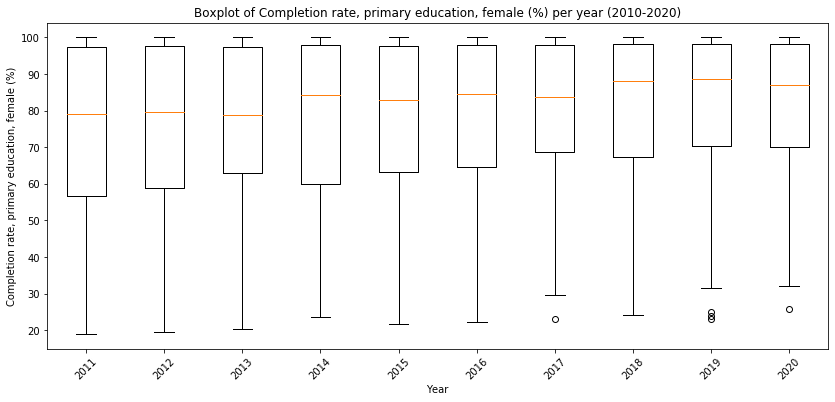



Descriptive statistics of SDG variable: Completion rate, primary education, male (%)

YEAR        2011        2012        2013        2014        2015        2016  \
count  83.000000   83.000000   83.000000   83.000000   83.000000   83.000000   
mean   72.969521   73.715987   74.338743   75.431999   75.732555   76.307217   
std    23.373867   23.188100   22.769557   22.153761   22.163001   21.856924   
min    19.300000   19.500000   19.900000   27.400000   20.800000   21.200000   
25%    54.374465   57.900000   59.000000   60.997475   61.253320   58.871245   
50%    75.000000   76.300000   77.800000   79.100000   78.600000   80.900000   
75%    96.065000   96.200000   96.759875   96.475000   97.144995   97.424995   
max    99.900000  100.000000  100.000000  100.000000  100.000000  100.000000   

YEAR         2017        2018        2019        2020  
count   83.000000   83.000000   83.000000   83.000000  
mean    76.805325   77.388466   77.378308   78.112904  
std     21.638529   21.

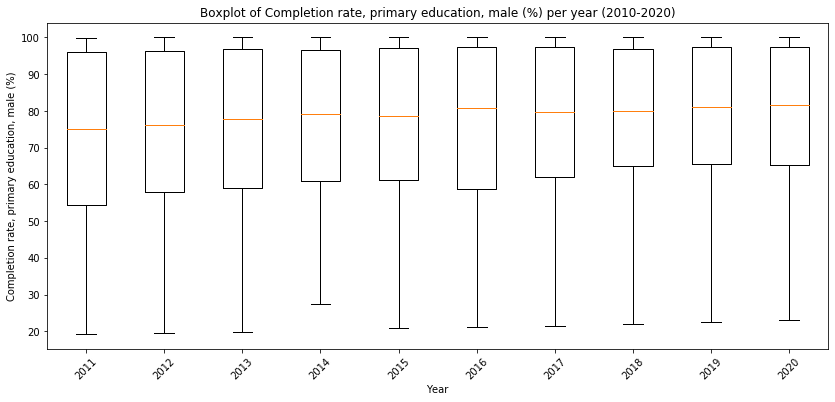

In [17]:
####
##Data exploration and visualizations per sdg variable and year
####

for i in range(len(sdg_clean_list)): 

    #Descriptive statistics
    print("\n\033[1m"+"\nDescriptive statistics of SDG variable: "+sdg_clean_list[i]+"\033[0m\n")
    print(((sdg_df_final[i]).T).describe())
        
    #Create boxplots
    plt.figure(figsize=(14, 6))
    plt.boxplot(sdg_df_final[i])
    plt.title(f"Boxplot of {sdg_clean_list[i]} per year (2010-2020)")
    plt.ylabel(sdg_clean_list[i])
    plt.xlabel("Year")
    plt.xticks(list(range(1,len(sdg_df_final[i])+1)), list((sdg_df_final[i].T).columns), rotation=45)
    plt.show()


### 4.2 Per predictor variable and year<a name="paragraph8"></a>

[Return to contents](#contents)  



Descriptive statistics of economic variable: GDP (current US$)

               2011          2012          2013          2014          2015  \
count  8.300000e+01  8.300000e+01  8.300000e+01  8.300000e+01  8.300000e+01   
mean   1.836832e+11  1.996360e+11  2.160467e+11  2.299133e+11  2.337147e+11   
std    8.519092e+11  9.562527e+11  1.067607e+12  1.170173e+12  1.235648e+12   
min    2.314893e+08  2.506808e+08  3.005545e+08  3.465283e+08  3.160661e+08   
25%    6.774886e+09  7.180629e+09  7.799839e+09  7.685506e+09  7.322333e+09   
50%    1.781428e+10  1.852860e+10  1.909102e+10  1.979725e+10  1.990711e+10   
75%    5.989377e+10  6.465698e+10  7.158080e+10  7.595142e+10  6.787708e+10   
max    7.550000e+12  8.530000e+12  9.570000e+12  1.050000e+13  1.110000e+13   

               2016          2017          2018          2019          2020  
count  8.300000e+01  8.300000e+01  8.300000e+01  8.300000e+01  8.300000e+01  
mean   2.363993e+11  2.604222e+11  2.827587e+11  2.919887e+11  2.8

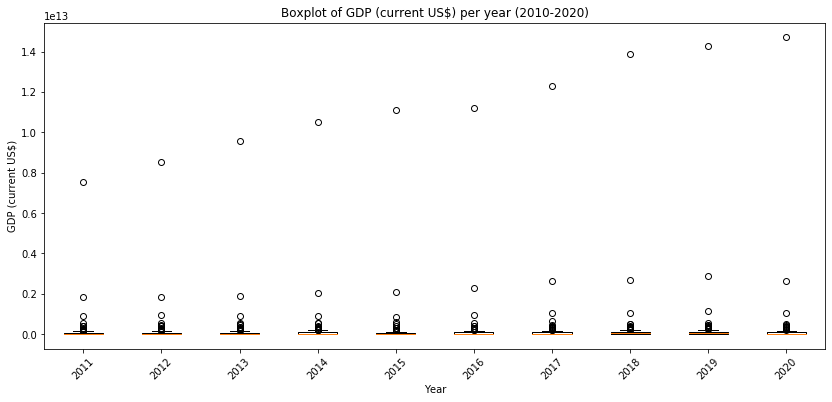



Descriptive statistics of economic variable: GDP growth (annual %)

            2011       2012       2013       2014       2015       2016  \
count  83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean    5.094835   5.220685   4.370842   4.196031   3.067547   3.241584   
std     3.487451   3.619678   5.539304   3.017884   4.220166   3.724055   
min    -1.917696  -1.712683 -36.391977  -6.552631 -20.598771  -8.816417   
25%     3.016712   2.992335   2.769581   2.370376   1.950316   1.208866   
50%     5.162133   4.800000   4.734219   4.326846   3.700000   3.776679   
75%     6.494151   7.250618   6.249225   6.266897   5.684985   5.801182   
max    17.290778  16.665429  20.715768  13.543771  10.392463  13.787373   

            2017       2018       2019       2020  
count  83.000000  83.000000  83.000000  83.000000  
mean    3.790184   3.578083   3.095147  -3.656796  
std     2.893989   2.801746   3.092071   8.110838  
min    -5.667503  -6.236551  -8.100000 -31.982

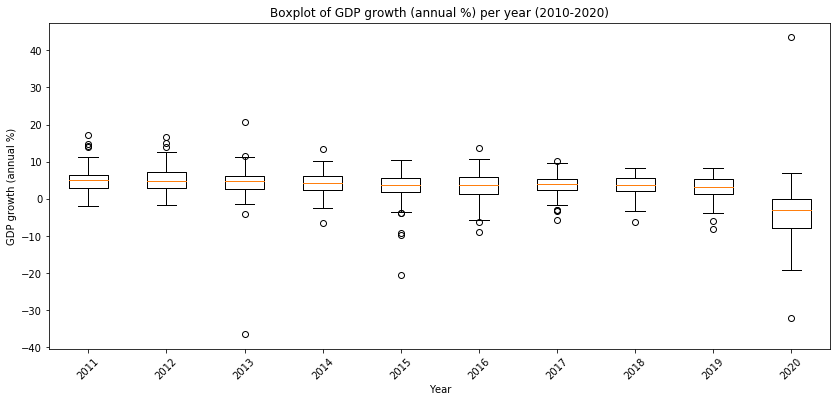



Descriptive statistics of economic variable: GDP per capita (current US$)

               2011          2012          2013          2014          2015  \
count     83.000000     83.000000     83.000000     83.000000     83.000000   
mean    4043.615905   4198.696037   4360.382144   4400.884728   4014.031007   
std     4288.408536   4393.781964   4513.956921   4478.919939   4018.747824   
min      249.577973    252.358866    256.975647    274.857842    293.455172   
25%      978.184583   1002.550172   1085.083825   1129.820164   1154.484842   
50%     2487.598017   2723.822191   2871.429701   2926.679960   2687.480056   
75%     5634.047186   6026.329658   6203.196862   6192.641945   5538.568226   
max    21641.693900  21711.151590  20390.737270  20270.933770  18214.460620   

               2016          2017          2018          2019          2020  
count     83.000000     83.000000     83.000000     83.000000     83.000000  
mean    3883.602161   4152.995077   4305.036240   4305.

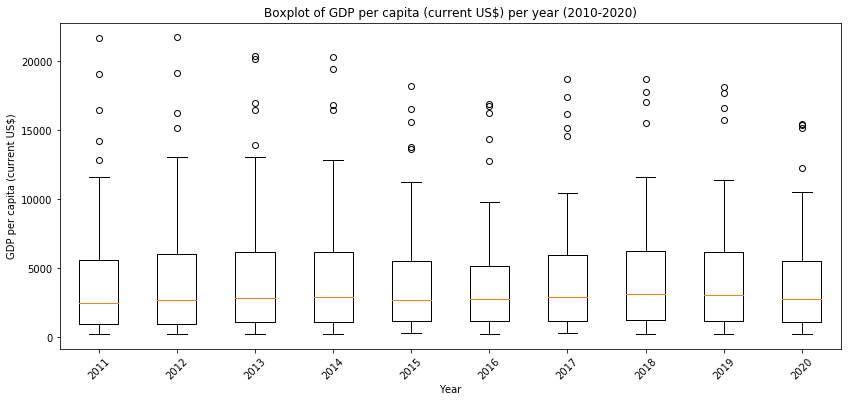



Descriptive statistics of economic variable: Inflation, GDP deflator (annual %)

            2011       2012       2013       2014       2015       2016  \
count  83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean   10.756522   7.035242   5.341414   5.251537   3.839440   5.693723   
std     9.475529   9.475609   7.755679   7.382414   8.646685   8.028527   
min    -0.690981  -0.850533  -4.141367 -11.876323 -30.199654 -11.104171   
25%     4.302659   2.567646   1.545945   1.236495   1.141847   1.391402   
50%     8.714230   5.070422   3.690650   3.560821   2.883509   2.980114   
75%    13.994826   8.217329   6.170881   7.033676   6.657315   7.592679   
max    71.038822  75.277369  54.012912  40.282972  38.881639  41.119380   

            2017       2018        2019        2020  
count  83.000000  83.000000   83.000000   83.000000  
mean    7.171540   6.602836    9.279883   12.545596  
std     8.603697  10.574398   38.793447   67.938268  
min    -2.182015  -2.8875

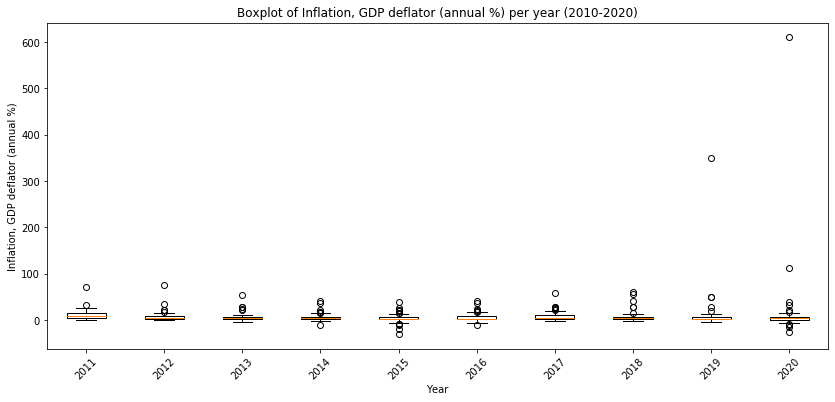



Descriptive statistics of economic variable: Mobile cellular subscriptions (per 100 people)

             2011        2012        2013        2014        2015        2016  \
count   83.000000   83.000000   83.000000   83.000000   83.000000   83.000000   
mean    78.241622   84.391135   90.040264   93.656789   96.557173   97.066583   
std     38.457882   39.174672   39.636838   38.557113   36.270858   36.025116   
min      2.438917    7.254130   13.176576   22.382360   27.652949   27.510630   
25%     48.954787   58.048392   60.669077   66.735041   71.554154   73.373309   
50%     71.758517   83.900880   91.562476   91.899629   94.156028   95.364736   
75%    105.217170  113.431099  119.000910  122.629806  124.993145  120.430578   
max    181.720218  180.493418  178.343071  177.019589  163.875172  173.505481   

             2017        2018        2019        2020  
count   83.000000   83.000000   83.000000   83.000000  
mean    98.540570   98.483282  100.566602   99.938651  
std    

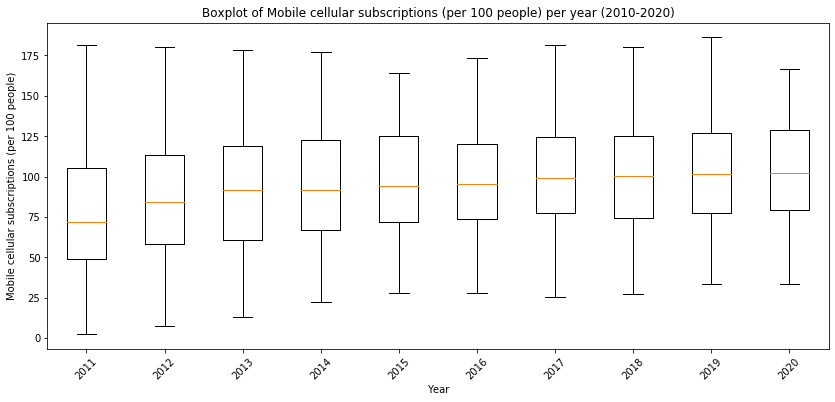



Descriptive statistics of economic variable: Population growth (annual %)

             2011       2012       2013       2014       2015       2016  \
count   83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
unique  83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
top     -1.202868  -1.546958  -1.745365  -1.722307  -1.526305  -1.264728   
freq     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            2017       2018       2019       2020  
count   83.00000  83.000000  83.000000  83.000000  
unique  83.00000  83.000000  83.000000  83.000000  
top     -1.03088   1.250763   1.718533   1.842672  
freq     1.00000   1.000000   1.000000   1.000000  


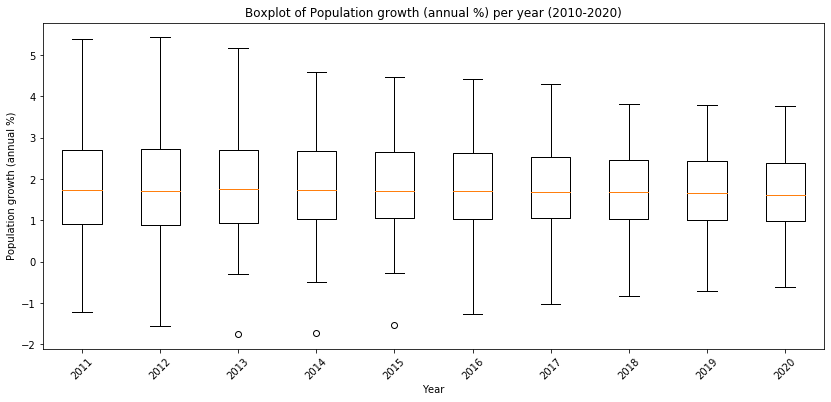



Descriptive statistics of economic variable: Population, total

             2011       2012         2013       2014        2015       2016  \
count        83.0       83.0         83.0       83.0        83.0       83.0   
unique       83.0       83.0         83.0       83.0        83.0       83.0   
top     1336180.0  2039551.0  191260799.0  3901311.0  20001663.0  1215181.0   
freq          1.0        1.0          1.0        1.0         1.0        1.0   

              2017      2018        2019      2020  
count         83.0      83.0        83.0      83.0  
unique        83.0      83.0        83.0      83.0  
top     69209817.0  779007.0  18628749.0  786559.0  
freq           1.0       1.0         1.0       1.0  


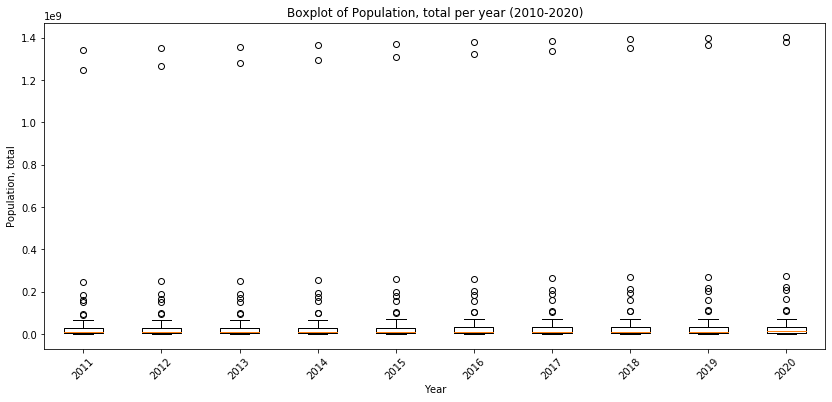

In [18]:
####
##Data exploration and visualizations per economic variable and year
####

for i in range(len(econ_clean_list)): 

    #Descriptive statistics
    print("\n\033[1m"+"\nDescriptive statistics of economic variable: "+econ_clean_list[i]+"\033[0m\n")
    print(econ_df_final[i].T.describe())
        
    #Create boxplots
    plt.figure(figsize=(14, 6))
    plt.boxplot(econ_df_final[i])
    plt.title(f"Boxplot of {econ_clean_list[i]} per year (2010-2020)")
    plt.ylabel(econ_clean_list[i])
    plt.xlabel("Year")
    plt.xticks(list(range(1,len(econ_df_final[i].index)+1)), [int(i) for i in list(econ_df_final[i].index)], rotation=45)
    plt.show()



**Main Findings (of 4.1 and 4.2):**    

The boxplots clearly indicate a post-covid drop in some economic predictors (in 2020 versus the trend of previous years), such as annual GDP growth, but not in educational outcomes. This suggests that the effects of covid may not be strong in the selected educational outcomes. 

### 4.3 Selection of outcome and predictor variables <a name="paragraph9"></a>

[Return to contents](#contents)  

In [19]:
####
##Selection of variables to be used in the model
####

#Outcome variable
print("\nThe outcome variable (SDG variable) is")
print(f"- {sdg_clean_list[0]} in 2019")
print("\nThe outcome variables disaggregated by sex will not be used, as they are similar to the non-disaggregated variable:")
print(f"- {sdg_clean_list[1]}")
print(f"- {sdg_clean_list[2]}")

y=list(sdg_df_final[0].loc[2019])

#Predictor variables that do not need transformation
print("\nThe predictor variables (economic variables) are:")
X_list=[]
for i in [1,2,3,4,5]:
    print ("-", econ_clean_list[i], "in 2011")
    X_list.append(list(econ_df_final[i].loc["2011"]))
    print ("-", econ_clean_list[i], "in 2015")
    X_list.append(list(econ_df_final[i].loc["2015"]))
    print ("-", econ_clean_list[i], "in 2019")
    X_list.append(list(econ_df_final[i].loc["2019"]))

#Transform list of predictor variables (X list) to dataframe (X dataframe):
X = pd.DataFrame(X_list).T
X.rename(columns={0:"Annual GDP growth % in 2011", 1:"Annual GDP growth % in 2015", 2:"Annual GDP growth % in 2019", 
          3:"GDP per capita USD in 2011", 4: "GDP per capita USD in 2015", 5: "GDP per capita USD in 2019",
          6: "Annual inflation % in 2011", 7:"Annual inflation % in 2015", 8: "Annual inflation % in 2019",
          9: "Mobile per 100 people in 2011", 
          10: "Mobile per 100 people in 2015", 
          11: "Mobile per 100 people in 2019", 
          12: "Annual population growth % in 2011", 
          13: "Annual population growth % in 2015", 
          14: "Annual population growth % in 2019"}, inplace=True)

#List of excluded predictor variables
print("\nThe excluded economic indicators (due to duplication with the other indicators) are:")
print ("-", econ_clean_list[0])
print ("-", econ_clean_list[6])



The outcome variable (SDG variable) is
- Completion rate, primary education, both sexes (%) in 2019

The outcome variables disaggregated by sex will not be used, as they are similar to the non-disaggregated variable:
- Completion rate, primary education, female (%)
- Completion rate, primary education, male (%)

The predictor variables (economic variables) are:
- GDP growth (annual %) in 2011
- GDP growth (annual %) in 2015
- GDP growth (annual %) in 2019
- GDP per capita (current US$) in 2011
- GDP per capita (current US$) in 2015
- GDP per capita (current US$) in 2019
- Inflation, GDP deflator (annual %) in 2011
- Inflation, GDP deflator (annual %) in 2015
- Inflation, GDP deflator (annual %) in 2019
- Mobile cellular subscriptions (per 100 people) in 2011
- Mobile cellular subscriptions (per 100 people) in 2015
- Mobile cellular subscriptions (per 100 people) in 2019
- Population growth (annual %) in 2011
- Population growth (annual %) in 2015
- Population growth (annual %) in 2019

**Explanation (of 4.3):**    

Based on the visualizations in 4.1 and 4.2, we excluded two outcome variables and two economic variables, as they are too similar with other variables (as clarified above). For example, primary completion rates disagreggated by sex (males and females) are similar to the primary completion rates (not disaggregated). So, we keep only the not disaggregated variable in 2019, as the outcome variable in our regressions.  
   
In addition, we did not cover in class time series regressions. Therefore, we decided to evaluate the potential effect of time variations by including the situation five years ago (in 2015), ten years ago (in 2011), and the current situation (in 2019) of the predictor variables in our non-time series regressions. Other authors followed similar strategy when predicting the outbreak of diseases using random forest models [(link here)](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-15-276)

### 4.4 Visualization of outcome versus predictor variables <a name="paragraph10"></a>

[Return to contents](#contents)  

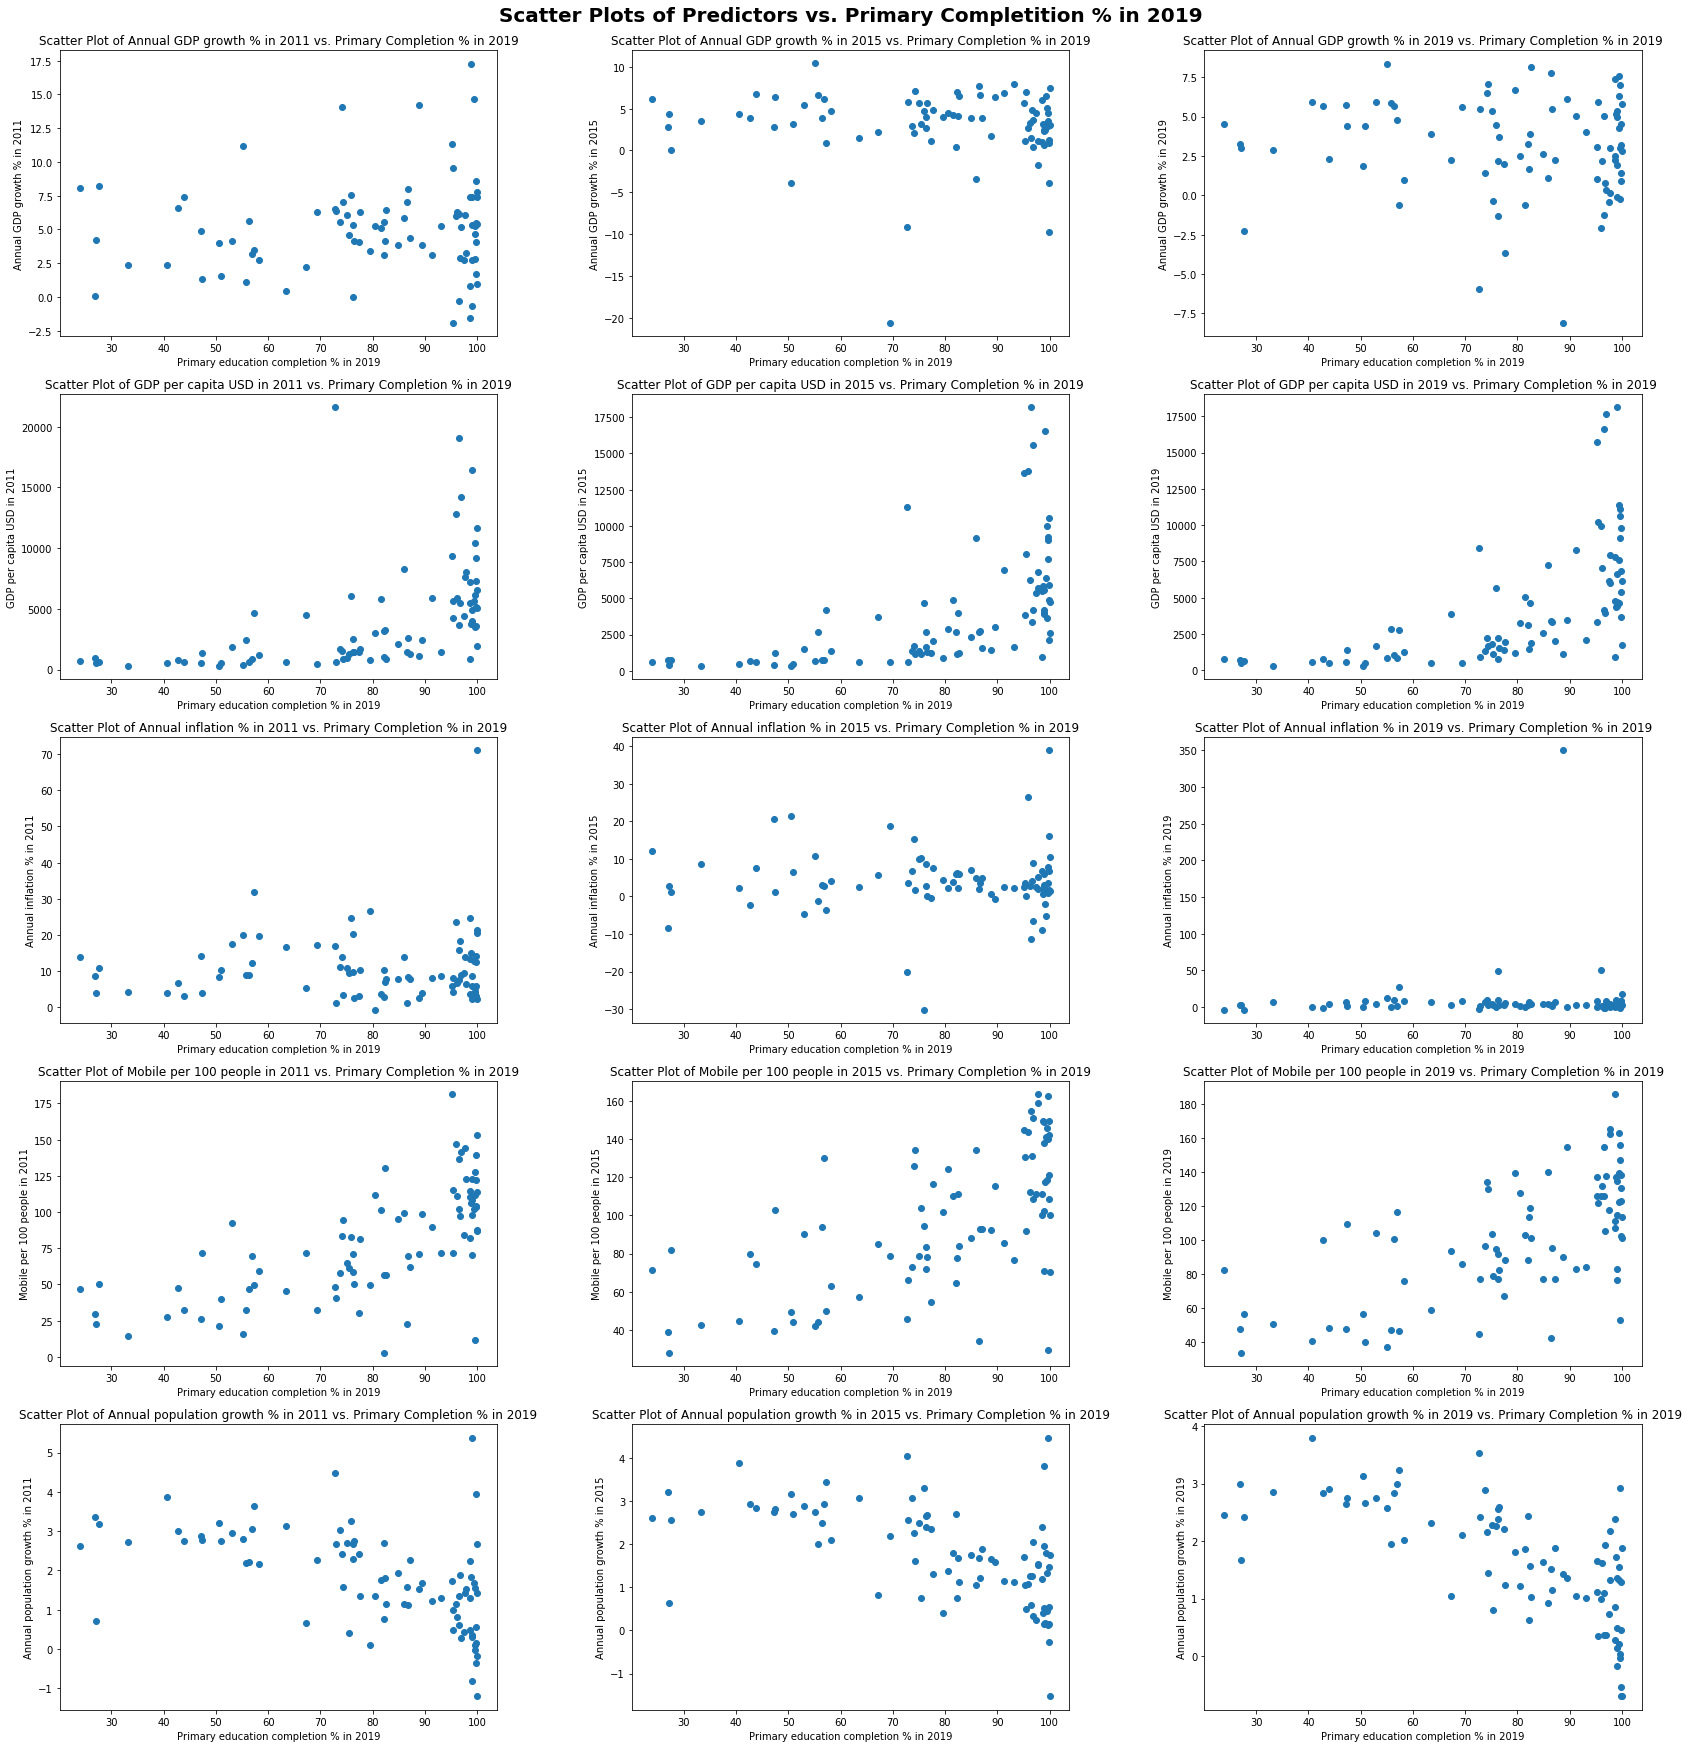

In [20]:
####
##Scatter plots between outcome and predictor variables
####

#List of predictor variables
list_predictors=X.columns

#Figure size and location
fig, axes = plt.subplots(5,3, figsize=(24, 24)) 

#Iteration for scatter plots
for i, elem in enumerate(list_predictors):
    axes.flatten()[i].scatter(y,X[elem])
    axes.flatten()[i].set_title(f"Scatter Plot of {elem} vs. Primary Completion % in 2019")
    axes.flatten()[i].set_xlabel("Primary education completion % in 2019")
    axes.flatten()[i].set_ylabel(elem)

#Set title of subplots
fig.suptitle('Scatter Plots of Predictors vs. Primary Completition % in 2019', y=1.01, fontweight='bold', fontsize=20) 

plt.tight_layout() 
plt.show()



### 4.5 Correlation between outcome and predictor variables<a name="paragraph11"></a>

[Return to contents](#contents)  

In [21]:
####
##Correlation between the outcome and the predictor variables
####
print("\nThe Pearson correlation between primary education completion % in 2019 and the following predictor variables is:")

for i in range(len(list_predictors)):
    print(f"- {list_predictors[i]}: {round(X[list_predictors[i]].corr(pd.Series(y)),4)}")


The Pearson correlation between primary education completion % in 2019 and the following predictor variables is:
- Annual GDP growth % in 2011: 0.0917
- Annual GDP growth % in 2015: -0.064
- Annual GDP growth % in 2019: -0.0687
- GDP per capita USD in 2011: 0.4941
- GDP per capita USD in 2015: 0.5608
- GDP per capita USD in 2019: 0.5999
- Annual inflation % in 2011: 0.049
- Annual inflation % in 2015: -0.0084
- Annual inflation % in 2019: 0.0585
- Mobile per 100 people in 2011: 0.6729
- Mobile per 100 people in 2015: 0.6294
- Mobile per 100 people in 2019: 0.6502
- Annual population growth % in 2011: -0.5331
- Annual population growth % in 2015: -0.5545
- Annual population growth % in 2019: -0.6825


**Main Findings (of 4.4 and 4.5)**

As observed in the scatter plots in 4.4, the correlation results in 4.5 mainly show that:      
- the higher the GDP per capita, the higher the primary education completion   
- the higher the mobile connectivity (mobile per 100 people), the higher the primary education completion   
- the higher the population growth, the lower the primary education completion    
   
The annual GDP growth and annual inflation are not linearly correlated with primary education completion  

### 4.6 Correlation between predictor variables<a name="paragraph12"></a>

[Return to contents](#contents)  

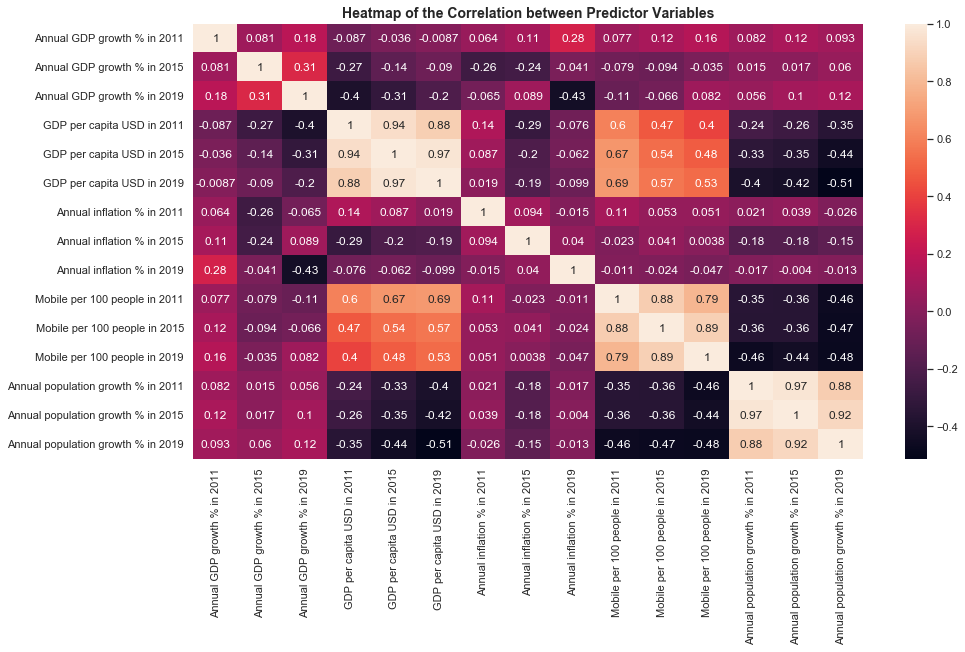

In [22]:
####
##Heatmap of the correlation between predictor variables
####

#Correlation between predictor variables
corrMatrix = X.corr()

#Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
ax = plt.axes()
sns.heatmap(corrMatrix, annot=True, ax = ax)
ax.set_title('Heatmap of the Correlation between Predictor Variables', fontweight='bold', fontsize=14)

plt.show()

**Main Findings (of 4.6)**

The GDP per capita and mobile per 100 people and positively correlated (the higher the GDP, the higher the connectivity), while the annual population growth is negatively correlated with both GDP per capita and mobile per 100 people (the higher the annual population growth, the lower the GDP and connectivity). 


<div class='exercise-r'>

### V. Build the Models<a name="paragraph13"></a>
    
</div>

**Description of this section:**    

This section includes the code, explanations, and results regarding:
- Pre-processing of the data (generate dummies, interaction, standarization of continuous variables, and train-test split with stratification)
- Linear regression (parametric regression)
- Lasso linear regression (with alpha tunned using cross validation)
- k-NN regression (non-parametric regression with k tunned using cross validation)
- Single decision tree (with depth tunned using cross validation)
- Bagging decision tree regression (with depth tunned using cross validation)
- Random forest tree regression (with depth tunned using cross validation)
- Adaboost regression (with tunned depth and optimal number of estimators)


### 5.1 Pre-process data <a name="paragraph14"></a>


[Return to contents](#contents)  

In [23]:
####
## Generate dummy variables for geographic region and development status of countries
### 

#Read file with 179 geographic regions and development status of countries
sdg_region=pd.read_csv("SDG_REGION.csv")

#List with included countries
list_countries=list(sdg_df_final[0].columns)


##Generate dummy variables per geographic region

#List of geographic regions for the sdgs
list_geo=["SDG: Africa (Northern)",
"SDG: Africa (Sub-Saharan)",
"SDG: Asia (Central and Southern)",
"SDG: Asia (Eastern and South-eastern)",
"SDG: Asia (Western)",
"SDG: Latin America and the Caribbean",
"SDG: Northern America and Europe",
"SDG: Oceania (Australia/New Zealand)",
"SDG: Oceania (excl. Australia/New Zealand)"
]

#Filter file by geographic regions in list
filtered_sdg_region=sdg_region[sdg_region["REGION_ID"].isin(list_geo)]

#Include country names from country codes
filtered_sdg_region["COUNTRY_ID"].replace(country_dict, inplace=True)

#Filter region file by included countries
filtered_sdg_country=filtered_sdg_region[filtered_sdg_region["COUNTRY_ID"].isin(list_countries)]

#Sort and check matching of filtered region file with list of countries
ordered_sdg_country=filtered_sdg_country.sort_values(by=['COUNTRY_ID'])
regions=ordered_sdg_country["REGION_ID"]
regions_dummies=pd.get_dummies(regions)


##Generate dummy variables per development status
sdg_region=pd.read_csv("SDG_REGION.csv")

#List of development status
list_development=["WB: Low income (July 2021)",
"WB: Middle income (July 2021)",
"WB: High income (July 2021)"
]

#Filter file by development status in list
filtered_sdg_dev=sdg_region[sdg_region["REGION_ID"].isin(list_development)]

#Include country names from country codes
filtered_sdg_dev["COUNTRY_ID"].replace(country_dict, inplace=True)

#Filter development file by included countries
included_sdg_country=filtered_sdg_dev[filtered_sdg_dev["COUNTRY_ID"].isin(list_countries)]

#Sort and check matching of filtered region file with list of countries
ordered_sdg_country=included_sdg_country.sort_values(by=['COUNTRY_ID'])
dev_status=ordered_sdg_country["REGION_ID"]
dev_dummies=pd.get_dummies(dev_status)

#Print results
print(f"There are {regions_dummies.shape[1]} dummies for the geographical regions and {regions_dummies.shape[0]} rows")
print(f"The description of the dummies for geographical regions is provided below:")
print(regions_dummies.describe())
print(f"\n\nThere are {dev_dummies.shape[1]} dummies for the development status and {dev_dummies.shape[0]} rows")
print(f"The description of the dummies for the development status is provided below:")
print(dev_dummies.describe())


There are 8 dummies for the geographical regions and 83 rows
The description of the dummies for geographical regions is provided below:
       SDG: Africa (Northern)  SDG: Africa (Sub-Saharan)  \
count               83.000000                  83.000000   
mean                 0.048193                   0.421687   
std                  0.215475                   0.496831   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   1.000000   
max                  1.000000                   1.000000   

       SDG: Asia (Central and Southern)  \
count                         83.000000   
mean                           0.132530   
std                            0.341127   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                   

**Explanation (of the above code cell):**
<br>
For the Milestone 2 of the project, we ran as baseline models a linear and a lasso linear regression models. Many of the predictors of the lasso model shrank to zero. Therefore, we decided to include dummies variables related to geographic location and overall development status of the countries, as dummy variables in the models for the final project. (We also decided to include interaction effects, which are conducted and explained in the next cells of this Notebook).   
<br>
As there are few countries in some of the categories, we will only use one dummy for geographic location and one dummy for development status:
- For geographic location : SDG: Africa (Sub-Saharan)
- For development status : WB: Low income (July 2021)   

This means that the other categories will be used as reference (for geographic location the comparison will be "SDG: Africa (Sub-Saharan)" versus all other regions in the world; and for development status will be "WB: Low income (July 2021)" versus other development status)

Note:  
SDG = Sustainable Development Goal   
WB = World Bank

In [24]:
####
##Main interaction effects
####

list_forinteractions=["GDP per capita USD in 2019", "Mobile per 100 people in 2019", "Annual population growth % in 2019"]

#X_poly below includes the list_interactions and interaction effects of list_interactions
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly=pd.DataFrame(poly.fit_transform(X[list_forinteractions]))

X_poly.rename(columns={0:list_forinteractions[0], 
                       1:list_forinteractions[1],
                       2:list_forinteractions[2],
                       3:"GDPcapitaXMobile_2019",
                       4:"GDPcapitaXAnnualPop_2019",
                       5:"MobileXAnnualPop_2019"}, inplace=True)

#Drop no interactions
X_poly.drop(list_forinteractions, axis=1, inplace=True)

#Print results
print(f"There are {X_poly.shape[0]} rows and {X_poly.shape[1]} columns in the interaction dataframe (X_poly)")
print(f"\nThe description of the interaction effects is provided below:")
print(X_poly.describe())


There are 83 rows and 3 columns in the interaction dataframe (X_poly)

The description of the interaction effects is provided below:
       GDPcapitaXMobile_2019  GDPcapitaXAnnualPop_2019  MobileXAnnualPop_2019
count           8.300000e+01                 83.000000              83.000000
mean            5.111083e+05               4940.227987             148.491094
std             5.933325e+05               6025.038549              97.973429
min             1.479947e+04              -4750.867209             -85.449214
25%             1.033484e+05               1875.463012              88.896603
50%             2.743750e+05               3650.310711             145.303544
75%             6.136251e+05               6057.606042             212.072310
max             2.580569e+06              30974.014215             454.575743


**Explanation (of the above code cell):**
<br>
For the Milestone 2 of the project, we ran as baseline models a linear and a lasso linear regression models. Many of the predictors of the lasso model shrank to zero. Therefore, we decided to include dummies variables related to geographic location and overall development status of the countries, as dummy variables for the final project (see previous cells of this Notebook). In addition, we decided to include interaction effects of the variables that did not shrink to zero in our baseline  lasso model. Those variables were:

- GDP per capita USD in 2019   
- Mobile per 100 people in 2011 (but here we included 2019 to make it easier to interpret and discuss the results)   
- Annual population growth % in 2019  

Interestingly, these variables also showed a significant (Pearson or linear) correlation with the outcome variable (see sub-section 4.5 for the full report of results)

- GDP per capita USD in 2019: 0.5999
- Mobile per 100 people in 2019: 0.6502
- Annual population growth % in 2019: -0.6825
   
We used polynomial features to obtain the interaction variables from these variables.

In [25]:
####
##Standarize continuous predictor variables and split data
####

#Get dataframe with only continuous variables 
X_cont=pd.concat([X,X_poly], axis=1)

#Standarize continuous predictor variables
X_std=StandardScaler().fit_transform(X_cont)

#Add dummy predictor variables
X_std_df=pd.DataFrame(X_std)
X_std_df["Region_Africa_SubSaharan"]=list(regions_dummies["SDG: Africa (Sub-Saharan)"])
X_std_df["Low_income"]=list(dev_dummies["WB: Low income (July 2021)"])

#Name all variables included in X
list_X_all_names=list(X_cont.columns) 
list_X_all_names.append("Region_Africa_SubSaharan")
list_X_all_names.append("Low_income")

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_std_df, y, train_size=0.80, random_state=0,
                                                    stratify=X_std_df[["Low_income"]])

#Size of X_train and X_test
print("The number of rows and columns of X_train are", X_train.shape)
print("The number of rows and columns of X_test are", X_test.shape)


The number of rows and columns of X_train are (66, 20)
The number of rows and columns of X_test are (17, 20)


**Explanation (of the above code cell):**
<br>
We standarized only the continuous variables (including the interactions of the continuous variables).   
For the split of train and test data, we stratified by the dummy variable low income (to get the same proportion of low income countries in the train and test data). In this regard, we could expect different results in primary education completion based on the income or development status of the countries, and therefore it was important to achieve balance on this variable. (Note: we could not stratify using y or primary completion rate, as it is a continuous variable). 

In [26]:
####
##Data for predicting 2020 using the models
####

#Actual outcome variable in 2020
y_2020=list(sdg_df_final[0].loc[2020])
print("\nThe actual value of primary education completion % in 2020 is:", round(np.mean(y_2020),4))

#Predictor variables corresponding to one year ahead than the predictor variables used in the model (for 2020)
print("\nThe predictor variables (economic indicators) for predicting in 2020 are: ")
X_list_pred2020=[]
for i in [1,2,3,4,5]:
    print ("-", econ_clean_list[i], "in 2012")
    X_list_pred2020.append(list(econ_df_final[i].loc["2012"]))
    print ("-", econ_clean_list[i], "in 2016")
    X_list_pred2020.append(list(econ_df_final[i].loc["2016"]))
    print ("-", econ_clean_list[i], "in 2020")
    X_list_pred2020.append(list(econ_df_final[i].loc["2020"]))

#Transform list of predictor variables to dataframe:
X_pred2020 = pd.DataFrame(X_list_pred2020).T
X_pred2020.rename(columns={0:"Annual GDP growth % in 2012", 1:"Annual GDP growth % in 2016", 2:"Annual GDP growth % in 2020", 
          3:"GDP per capita USD in 2012", 4: "GDP per capita USD in 2016", 5: "GDP per capita USD in 2020",
          6: "Annual inflation % in 2012", 7:"Annual inflation % in 2016", 8: "Annual inflation % in 2020",
          9: "Mobile per 100 people in 2012", 
          10: "Mobile per 100 people in 2016", 
          11: "Mobile per 100 people in 2020", 
          12: "Annual population growth % in 2012", 
          13: "Annual population growth % in 2016", 
          14: "Annual population growth % in 2020"}, inplace=True)

#Create interaction effects
list_interactions_2020=["GDP per capita USD in 2020", "Mobile per 100 people in 2020", "Annual population growth % in 2020"]

#X_poly below includes the list_interactions and interaction effects of list_interactions
poly_2020 = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly_2020=pd.DataFrame(poly.fit_transform(X_pred2020[list_interactions_2020]))

X_poly_2020.rename(columns={0:list_interactions_2020[0], 
                           1:list_interactions_2020[1],
                           2:list_interactions_2020[2],
                           3:"GDPcapitaXMobile_2020",
                           4:"GDPcapitaXAnnualPop_2020",
                           5:"MobileXAnnualPop_2020"}, inplace=True)

X_poly_2020.drop(list_interactions_2020, axis=1, inplace=True)

#Get dataframe with only continuous variables
X_cont_2020=pd.concat([X_pred2020,X_poly_2020], axis=1)

#Standarize continuous predictor variables
X_pred2020_std=StandardScaler().fit_transform(X_cont_2020)

#Add dummies
X_std_2020_df=pd.DataFrame(X_pred2020_std)
X_std_2020_df["Region_Africa_SubSaharan"]=list(regions_dummies["SDG: Africa (Sub-Saharan)"])
X_std_2020_df["Low_income"]=list(dev_dummies["WB: Low income (July 2021)"])

print("\nThe number of rows and columns of X_2020 are", X_std_2020_df.shape)


The actual value of primary education completion % in 2020 is: 79.7745

The predictor variables (economic indicators) for predicting in 2020 are: 
- GDP growth (annual %) in 2012
- GDP growth (annual %) in 2016
- GDP growth (annual %) in 2020
- GDP per capita (current US$) in 2012
- GDP per capita (current US$) in 2016
- GDP per capita (current US$) in 2020
- Inflation, GDP deflator (annual %) in 2012
- Inflation, GDP deflator (annual %) in 2016
- Inflation, GDP deflator (annual %) in 2020
- Mobile cellular subscriptions (per 100 people) in 2012
- Mobile cellular subscriptions (per 100 people) in 2016
- Mobile cellular subscriptions (per 100 people) in 2020
- Population growth (annual %) in 2012
- Population growth (annual %) in 2016
- Population growth (annual %) in 2020

The number of rows and columns of X_2020 are (83, 20)


**Explanation (of the above code cell):**   

For the predictor variables of 2020 (to be used in the models for predicting the outcome variable of 2020), we followed the same pre-processing procedure than for the X data (dummies, interactions, and standarization of continuous variables). 
   
For the predictor variables of 2020, the data 5 years ago correspond to 2016 (not 2015 as in the case of X), and 10 years ago to 2012 (not 2011 as in the case of X).  


### 5.2 (Standard) linear regression<a name="paragraph15"></a>


[Return to contents](#contents)  

In [27]:
####
##Standard linear regression
####

#"Standard" linear regression
linear_model=LinearRegression().fit(X_train,y_train)

#Intercept
linear_model_intercept=linear_model.intercept_
print(f"The intercept of the linear regression is {round(linear_model_intercept,4)}\n")

#Coefficients
linear_model_coef=linear_model.coef_
for i in range(len(list_X_all_names)):
    print(f"The coefficient of {list_X_all_names[i]} is {round(linear_model_coef[i],4)}")

#Accuracy score
linear_model_accu_train=linear_model.score(X_train, y_train)
linear_model_accu_test=linear_model.score(X_test, y_test)
print(f"\nThe training accuracy score of the model or training R2 is {round(linear_model_accu_train,4)}")   
print(f"The test accuracy score of the model or test R2 is {round(linear_model_accu_test,4)}")   
    
#Mean squared error
linear_model_mse_train=mean_squared_error(y_train,linear_model.predict(X_train))
linear_model_mse_test=mean_squared_error(y_test,linear_model.predict(X_test))
print(f"\nThe training mean squared error of the model is {round(linear_model_mse_train,4)}")
print(f"The test mean squared error of the model is {round(linear_model_mse_test,4)}")

#Model prediction for 2020
linear_model_2020=linear_model.predict(X_std_2020_df)
pred_dif_linear_2020=(np.mean(linear_model_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The linear model prediction of primary education completion % in 2020 is {round(np.mean(linear_model_2020),4)}")
print(f"\nThe mean difference between the actual data 2020 and model prediction for 2020 is {round(pred_dif_linear_2020,2)}%")

The intercept of the linear regression is 87.3266

The coefficient of Annual GDP growth % in 2011 is -0.9997
The coefficient of Annual GDP growth % in 2015 is -1.943
The coefficient of Annual GDP growth % in 2019 is 3.7762
The coefficient of GDP per capita USD in 2011 is 6.1071
The coefficient of GDP per capita USD in 2015 is -6.0087
The coefficient of GDP per capita USD in 2019 is 6.1251
The coefficient of Annual inflation % in 2011 is -1.4083
The coefficient of Annual inflation % in 2015 is 2.7424
The coefficient of Annual inflation % in 2019 is 3.5353
The coefficient of Mobile per 100 people in 2011 is 1.9635
The coefficient of Mobile per 100 people in 2015 is -2.0066
The coefficient of Mobile per 100 people in 2019 is 3.0258
The coefficient of Annual population growth % in 2011 is 1.4684
The coefficient of Annual population growth % in 2015 is 2.9228
The coefficient of Annual population growth % in 2019 is -11.9535
The coefficient of GDPcapitaXMobile_2019 is -3.0703
The coefficient

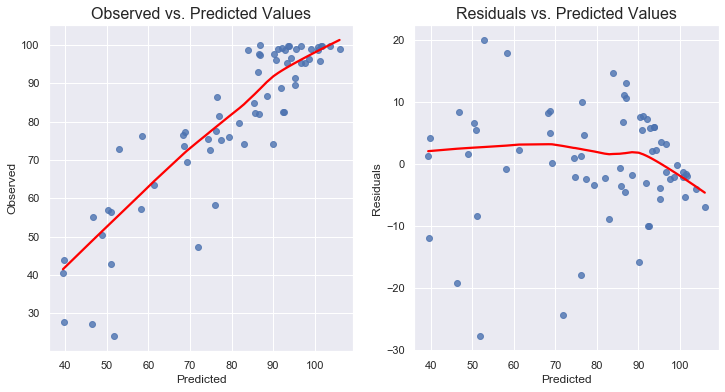

In [28]:
#Testing normality (modified from: https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)

X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()


def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2, figsize=(12,6))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y_train)    


**Findings (of 5.2)**

The linear model violates the heteroskedasticity assumption as observed in the Residuals versus Predicted graph above (the graph shows not a random pattern, but a cone-shaped pattern). Therefore, linear models (standard and lasso) are not suitable for prediction, as confidence intervals and hypothesis tests can be wrong, and are only included as reference in this project (as there were included as baseline models in Milestone 2 of our project).

### 5.3 Lasso linear regression (with alpha tuned using cross validation)<a name="paragraph16"></a>


[Return to contents](#contents)  

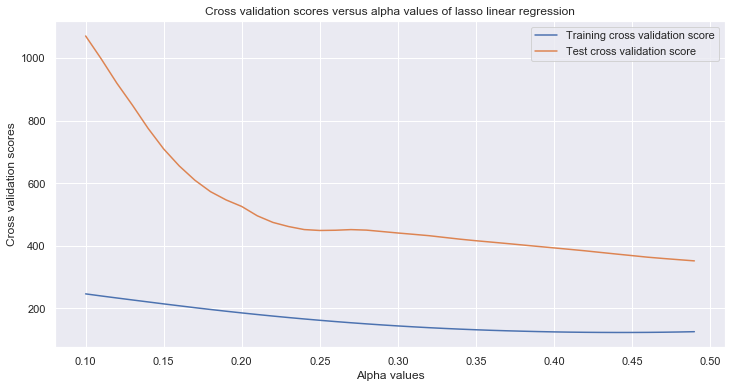

The lowest mean squared error was 352.2683 corresponding to an alpha = 0.49
Therefore, the chosen alpha for the final model is 0.49


In [29]:
####
##Lasso linear regression (with alpha tunned using cross validation)
####

#List of alphas for tuning the lasso regression
list_alpha=np.arange(0.1, 0.5, 0.01)

#Iterate for the cross validation scores at different alphas
cv_scores_train=[]
cv_scores_test=[]

for i in list_alpha:
    lasso_model=Lasso(alpha=i).fit(X_train,y_train)
    scores_train = cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    scores_test = cross_val_score(lasso_model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_scores_train.append(-np.mean(scores_train))
    cv_scores_test.append(-np.mean(scores_test))

#Plot the cross validation scores
plt.figure(figsize=(12,6))
plt.plot(list_alpha, cv_scores_train, label="Training cross validation score")
plt.plot(list_alpha, cv_scores_test, label="Test cross validation score")
plt.title("Cross validation scores versus alpha values of lasso linear regression")
plt.xlabel("Alpha values")
plt.ylabel("Cross validation scores")
plt.legend()
plt.show()

#Select best alpha
min_cross_val = min(cv_scores_test)
best_alpha_index = cv_scores_test.index(min_cross_val)
best_alpha=list_alpha[best_alpha_index]
print("The lowest mean squared error was", round(min_cross_val,4), 
      "corresponding to an alpha =", round(best_alpha,4))
print("Therefore, the chosen alpha for the final model is", round(best_alpha,4))


In [30]:
##Lasso Model with best alpha
lasso_model=Lasso(alpha=best_alpha).fit(X_train,y_train)

#Intercept
lasso_model_intercept=lasso_model.intercept_
print(f"The intercept of the lasso regression is {round(lasso_model_intercept,4)}\n")

#Coefficients
lasso_model_coef=lasso_model.coef_
for i in range(len(list_X_all_names)):
    print(f"The coefficient of {list_X_all_names[i]} is {round(lasso_model_coef[i],4)}")

#Accuracy score
lasso_model_accu_train=lasso_model.score(X_train, y_train)
lasso_model_accu_test=lasso_model.score(X_test, y_test)
print(f"\nThe training accuracy score of the model or training R2 is {round(lasso_model_accu_train,4)}")   
print(f"The test accuracy score of the model or test R2 is {round(lasso_model_accu_test,4)}")   

#Mean squared error
lasso_model_mse_train=mean_squared_error(y_train,lasso_model.predict(X_train))
lasso_model_mse_test=mean_squared_error(y_test,lasso_model.predict(X_test))

print(f"\nThe training mean squared error of the model is {round(lasso_model_mse_train,4)}")
print(f"The test mean squared error of the model is {round(lasso_model_mse_test,4)}")

#Model prediction for 2020
lasso_model_2020=lasso_model.predict(X_std_2020_df)
pred_dif_lasso_2020=(np.mean(lasso_model_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The lasso model prediction of primary education completion % in 2020 is {round(np.mean(lasso_model_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_lasso_2020,2)}%")

The intercept of the lasso regression is 86.3745

The coefficient of Annual GDP growth % in 2011 is -0.0
The coefficient of Annual GDP growth % in 2015 is -1.6214
The coefficient of Annual GDP growth % in 2019 is 2.1569
The coefficient of GDP per capita USD in 2011 is 0.9186
The coefficient of GDP per capita USD in 2015 is 0.0
The coefficient of GDP per capita USD in 2019 is 0.9829
The coefficient of Annual inflation % in 2011 is -0.4293
The coefficient of Annual inflation % in 2015 is 0.5091
The coefficient of Annual inflation % in 2019 is 1.9694
The coefficient of Mobile per 100 people in 2011 is 1.7406
The coefficient of Mobile per 100 people in 2015 is 0.0
The coefficient of Mobile per 100 people in 2019 is 1.9756
The coefficient of Annual population growth % in 2011 is 0.0
The coefficient of Annual population growth % in 2015 is 0.0
The coefficient of Annual population growth % in 2019 is -6.7479
The coefficient of GDPcapitaXMobile_2019 is 0.0
The coefficient of GDPcapitaXAnnualPo

**Findings (of 5.3)**

The linear model violates the heteroskedasticity assumption and therefore is not suitable for prediction, as indicated in 5.2.   

However, we proceed to run the lasso linear regression to inspect which predictors are different from zero (for example, if the dummies we added after the Milestone 2 of the project are different to zero).  

The dummies (Region_Africa_SubSaharan and Low_income) are both different from zero, providing hints that their inclusion in subsequent models can improve predictions.

### 5.4 k-NN regression (with k tuned using cross validation)<a name="kNN"></a>


[Return to contents](#contents)  

In [31]:
#Drop interaction effects from X dataframes (not needed for k-NN models and subsequent decision trees related models)
dict_names_x=dict(zip(list(X_train.columns), list_X_all_names))
X_train.rename(columns=dict_names_x, inplace=True)

dict_names_x=dict(zip(list(X_test.columns), list_X_all_names))
X_test.rename(columns=dict_names_x, inplace=True)

X_train.drop(["GDPcapitaXMobile_2019","GDPcapitaXAnnualPop_2019", "MobileXAnnualPop_2019"], axis=1, inplace=True)
X_test.drop(["GDPcapitaXMobile_2019","GDPcapitaXAnnualPop_2019", "MobileXAnnualPop_2019"], axis=1, inplace=True)


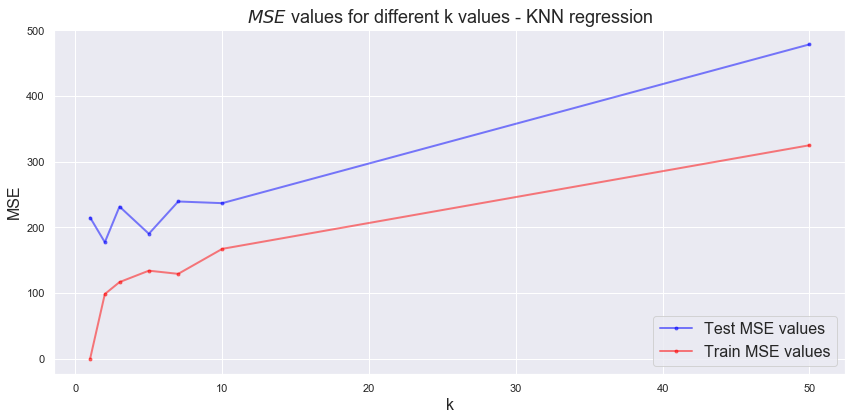

In [32]:
#For the MSE of the training data
# Create a dictionary to store the k values against MSE 
knn_dict_train = {}
knn_dict_test = {}
# List of k values
k_list=[1,2,3,5,7,10,50]
# Loop over all k values
for i in range(len(k_list)):   
    k_value=k_list[i]
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    # Fit the model on the train data
    model.fit(X_train,y_train)
    # Use the trained model to predict 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Calculate the MSE of the training data
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    # Store the MSE values of each k value in the dictionary
    knn_dict_train[k_value] = MSE_train
    knn_dict_test[k_value] = MSE_test

# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(12,6))
plt.plot(k_list, list(knn_dict_test.values()),'k.-',alpha=0.5,linewidth=2, color="blue", label="Test MSE values")
plt.plot(k_list, list(knn_dict_train.values()),'k.-',alpha=0.5,linewidth=2, color="red", label="Train MSE values")
# Set the title and axis labels
plt.xlabel('k',fontsize=16)
plt.ylabel('MSE',fontsize = 16)
plt.title('$MSE$ values for different k values - KNN regression',fontsize=18)
plt.legend(loc='lower right',fontsize=16)
plt.tight_layout()


In [33]:
# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict_test.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict_test.items() if value == min_mse]

# Print the best k-value
print ("The best model has a k value of",best_model[0],"with a test MSE of", round(min_mse,4))


The best model has a k value of 2 with a test MSE of 177.1426


In [34]:
# your code here
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

R2_train=r2_score(y_train, y_pred_train)
R2_test=r2_score(y_test, y_pred_test)

# Print the R2 score of the model
print(f"The train R2 score for the k-NN model using the best k is {round(R2_train,4)}")
print(f"The test R2 score for the k-NN model using the best k is {round(R2_test,4)}")


The train R2 score for the k-NN model using the best k is 0.7647
The test R2 score for the k-NN model using the best k is 0.6982


In [35]:
#Drop interaction effects from 2020 dataframes (not needed kNN and subsequent tree -related regressions)
dict_names_x=dict(zip(list(X_std_2020_df.columns), list_X_all_names))
X_std_2020_df.rename(columns=dict_names_x, inplace=True)
X_std_2020_df.drop(["GDPcapitaXMobile_2019","GDPcapitaXAnnualPop_2019", "MobileXAnnualPop_2019"], axis=1, inplace=True)


#Model prediction for 2020
kNN_model_2020=model.predict(X_std_2020_df)
pred_dif_kNN_2020=(np.mean(kNN_model_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The decision tree prediction of primary education completion % in 2020 is {round(np.mean(kNN_model_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_kNN_2020,2)}%")


The actual value of primary education completion % in 2020 is 79.7745
The decision tree prediction of primary education completion % in 2020 is 79.485
The mean difference between the actual data 2020 and the model prediction for 2020 is 2.74%


### 5.5 Single decision tree (with depth tuned using cross validation)<a name="paragraph17"></a>


[Return to contents](#contents)  

In [36]:
# Create custom functions for performing cross-validation
# and for plotting the results

def calc_meanstd(X_train, y_train, depths, cv):
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        clf = DecisionTreeRegressor(max_depth=depth)
        # calculate training score and save to list
        train_scores.append(clf.fit(X_train, y_train).score(X_train, y_train))
        # perform n-fold CV and save mean and std to lists
        scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores


def plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
):
    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,
        cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 1*cvstds,
        cvmeans + 1*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/- standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Maximum tree depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()


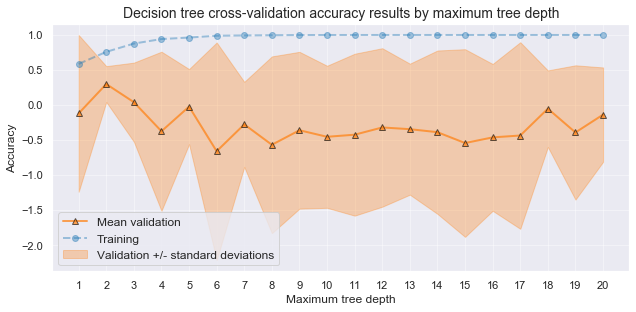

In [37]:
# set parameters for model fitting
depths = list(range(1, 21))
cv = 5

# perform CV and generate required results
cvmeans, cvstds, train_scores = calc_meanstd(X_train, y_train, depths, cv)

# convert results from lists to arrays for plotting function
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

# plot results
title = (
    "Decision tree cross-validation accuracy results by "
    "maximum tree depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)




In [38]:
# choose best depth
max_cvmeans=max(cvmeans)
best_cv_depth = list(cvmeans).index(max_cvmeans)+1 #+1 because indexes start at 0, while depths start at 1
idx = list(cvmeans).index(max(cvmeans))

# summarize CV results at best depth
print(
    "Cross-validated validation accuracy for our chosen best "
    "depth of {} is:\n\n\tmean    \t{:.4f}"
    "\n\t+/-2 stdev\t[{:.4f}, {:.4f}]\n".format(
        best_cv_depth,
        cvmeans[idx],
        cvmeans[idx] - 2*cvstds[idx],
        cvmeans[idx] + 2*cvstds[idx],
    )
)


# once depth is chosen (i.e. hyper-parameter is found),
# we re-fit the model with all training data
fitted_tree = DecisionTreeRegressor(
    max_depth=best_cv_depth
).fit(X_train, y_train)
best_cv_tree_train_score = fitted_tree.score(X_train, y_train)
best_cv_tree_test_score = fitted_tree.score(X_test, y_test)

# print model results summary
print(
    "The tree of max-depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_tree_train_score,
        best_cv_tree_test_score,
    )
)

Cross-validated validation accuracy for our chosen best depth of 2 is:

	mean    	0.2990
	+/-2 stdev	[-0.2126, 0.8106]

The tree of max-depth 2 trained on the full training set, achieves the following accuracy scores:

	train	0.7587
	TEST	0.6317


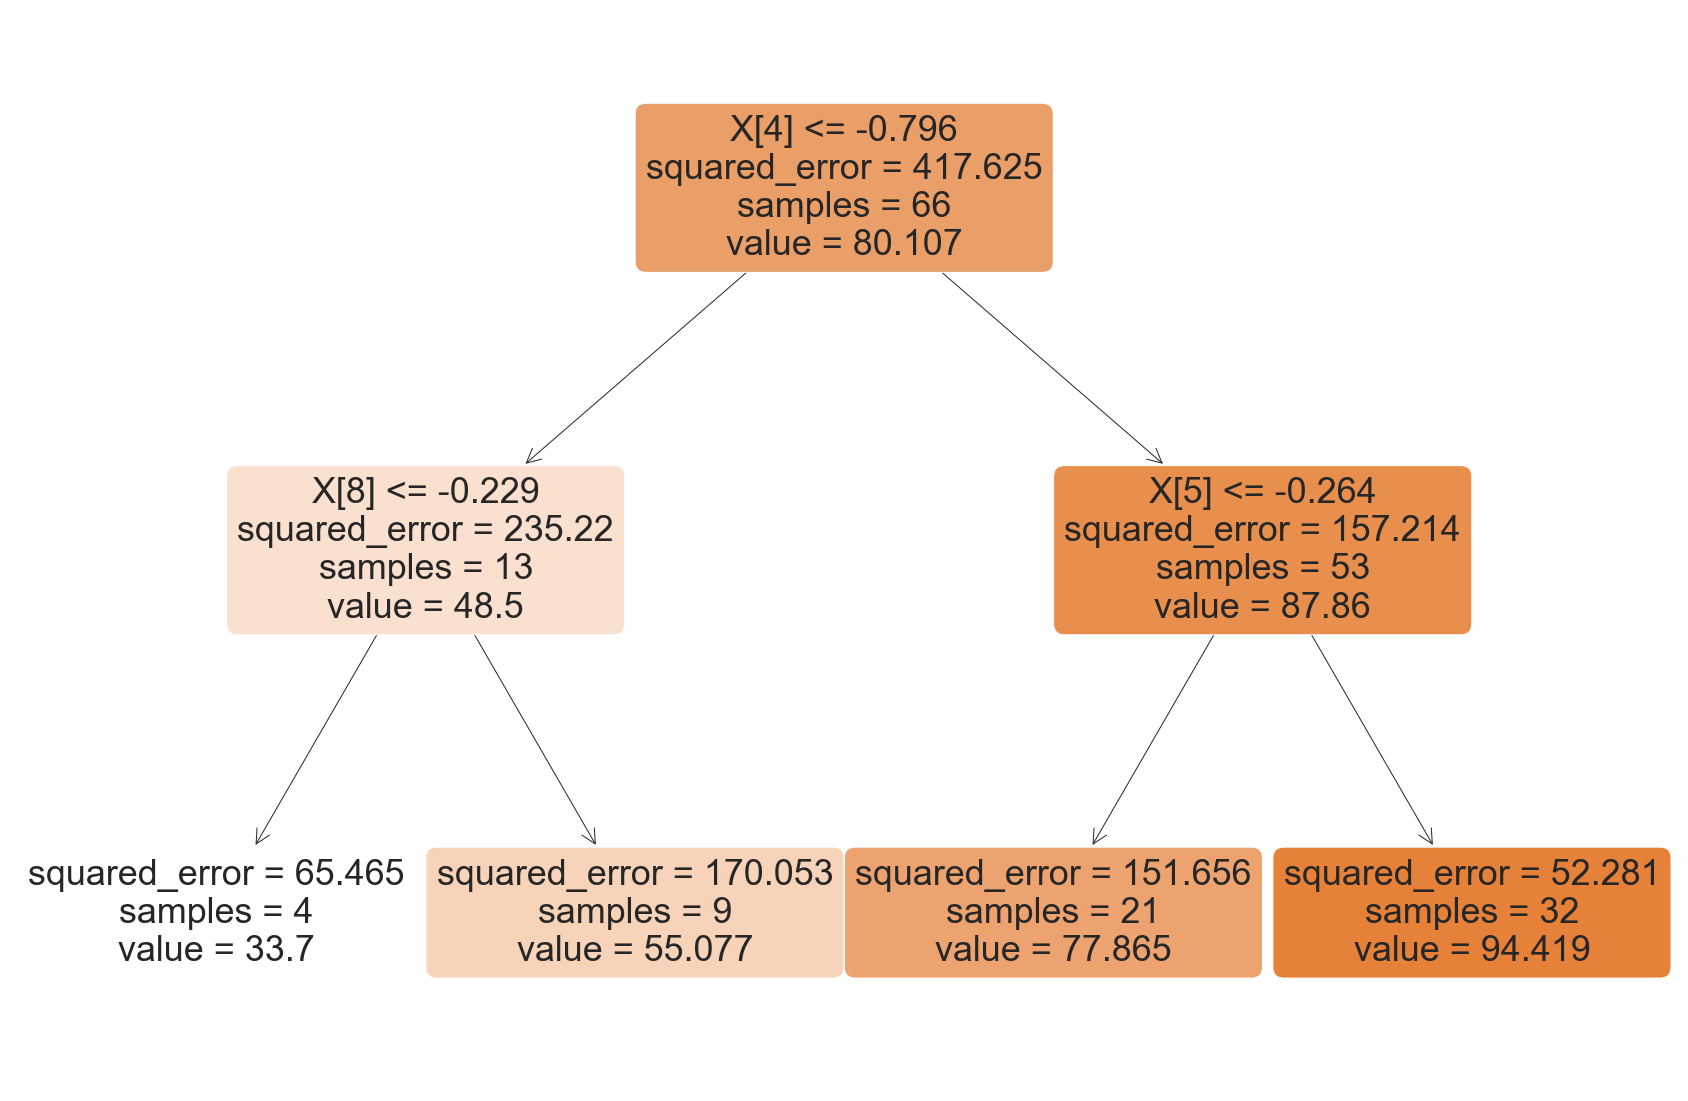

First depth level: X[4] = GDP per capita USD in 2015
Second depth level: X[8] = Annual inflation % in 2019
Second depth level: X[5] = GDP per capita USD in 2019


In [39]:
# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(fitted_tree, filled=True, rounded=True)


plt.show();

#Name of X_train columns
print("First depth level: X[4] =", list(X_train.columns)[4])
print("Second depth level: X[8] =", list(X_train.columns)[8])
print("Second depth level: X[5] =", list(X_train.columns)[5])


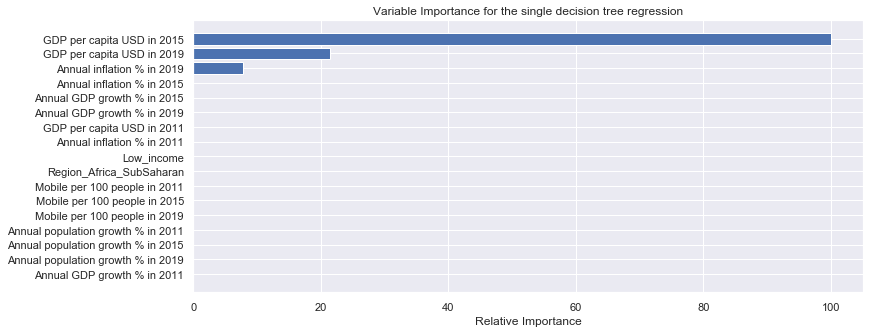

In [40]:
#Feature importance
feature_importance = fitted_tree.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the single decision tree regression')
plt.show()

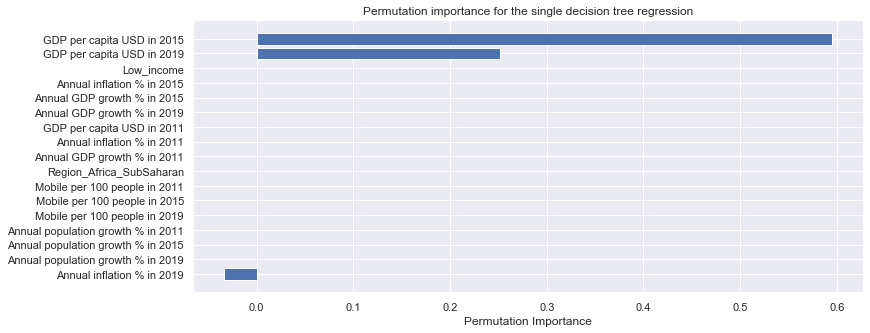

In [41]:
#Permutation
perm_importance = permutation_importance(fitted_tree, X_test, y_test)
perm = pd.DataFrame(perm_importance.importances_mean)
perm["names"]=list(X_train.columns)
perm.sort_values(0,inplace=True)

plt.figure(figsize=(12,5))
plt.barh(perm['names'], perm[0])
plt.xlabel("Permutation Importance")
plt.ylabel("")
plt.title("Permutation importance for the single decision tree regression")
plt.show()



In [42]:
#Model prediction for 2020
decision_tree_2020=fitted_tree.predict(X_std_2020_df)
pred_dif_tree_2020=(np.mean(decision_tree_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The decision tree prediction of primary education completion % in 2020 is {round(np.mean(decision_tree_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_tree_2020,2)}%")


The actual value of primary education completion % in 2020 is 79.7745
The decision tree prediction of primary education completion % in 2020 is 80.843
The mean difference between the actual data 2020 and the model prediction for 2020 is 5.39%


### 5.6 Bagging decision tree regression (with depth tuned using cross validation)<a name="bagging"></a>


[Return to contents](#contents)  

In [43]:
# Create custom functions for performing cross-validation
# and for plotting the results

def calc_meanstd(X_train, y_train, depths, cv):
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth, random_state=0), 
                                 n_estimators=num_bootstraps)
        # calculate training score and save to list
        train_scores.append(model.fit(X_train, y_train).score(X_train, y_train))
        # perform n-fold CV and save mean and std to lists
        scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores


def plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
):
    """Generate plot of decision tree results at various depths
    
    Generates plot illustrating training and cross-validation
    accuracy score results for single decision tree classifiers
    fit at varying max depths. One line represents training
    scores and another line represents mean validation scores
    with +/-2 standard deviation bounds around those mean
    scores.
    """
    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,
        cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 1*cvstds,
        cvmeans + 1*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/- standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()


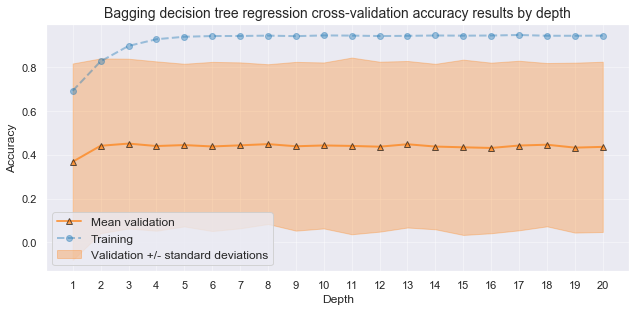

In [44]:
# set parameters for model fitting
depths = list(range(1, 21))
cv = 5
num_bootstraps=800

# perform CV and generate required results
cvmeans, cvstds, train_scores = calc_meanstd(X_train, y_train, depths, cv)

# convert results from lists to arrays for plotting function
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

# plot results
title = (
    "Bagging decision tree regression cross-validation accuracy results by "
    "depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)




In [45]:
# choose best depth
max_cvmeans=max(cvmeans)
best_cv_depth = list(cvmeans).index(max_cvmeans)+1
idx = list(cvmeans).index(max(cvmeans))

# summarize CV results at best depth
print(
    "Cross-validated validation accuracy for our chosen best "
    "depth of {} is:\n\n\tmean    \t{:.4f}"
    "\n\t+/-2 stdev\t[{:.4f}, {:.4f}]\n".format(
        best_cv_depth,
        cvmeans[idx],
        cvmeans[idx] - 2*cvstds[idx],
        cvmeans[idx] + 2*cvstds[idx],
    )
)


#Final model with tuned parameters:
max_depth = best_cv_depth

# Define the Bagging Regressor Model
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth, random_state=0), n_estimators=num_bootstraps)

# Fit the model on the train data
model_fit=model.fit(X_train, y_train)

best_cv_bag_train_score = model_fit.score(X_train, y_train)
best_cv_bag_test_score = model_fit.score(X_test, y_test)

# print model results summary
print(
    "The bagging decision tree regression of depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_bag_train_score,
        best_cv_bag_test_score,
    )
)

Cross-validated validation accuracy for our chosen best depth of 3 is:

	mean    	0.4518
	+/-2 stdev	[-0.3238, 1.2274]

The bagging decision tree regression of depth 3 trained on the full training set, achieves the following accuracy scores:

	train	0.8976
	TEST	0.7115


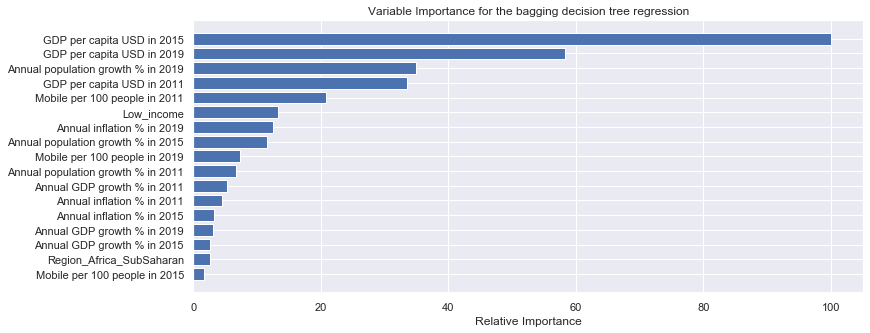

In [46]:
#Feature importance
feature_importance = np.mean([
    tree.feature_importances_ for tree in model_fit.estimators_
], axis=0)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the bagging decision tree regression')
plt.show()

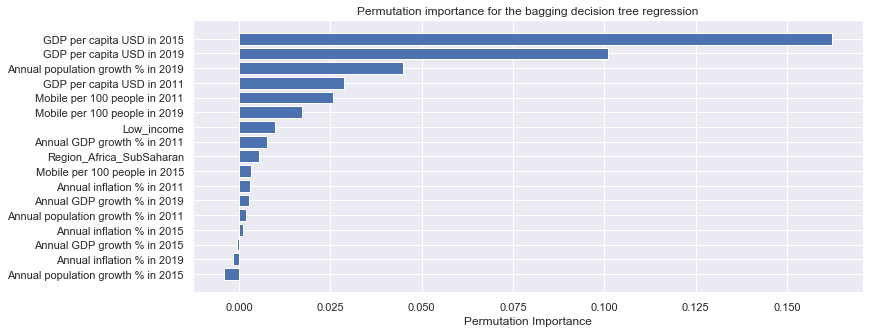

In [47]:
#Permutation
perm_importance = permutation_importance(model_fit, X_test, y_test)
perm = pd.DataFrame(perm_importance.importances_mean)
perm["names"]=list(X_train.columns)
perm.sort_values(0,inplace=True)

plt.figure(figsize=(12,5))
plt.barh(perm['names'], perm[0])
plt.xlabel("Permutation Importance")
plt.ylabel("")
plt.title("Permutation importance for the bagging decision tree regression")
plt.show()



In [48]:
#Model prediction for 2020
bagging_2020=model_fit.predict(X_std_2020_df)
pred_dif_bagging_2020=(np.mean(bagging_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The bagging prediction of primary education completion % in 2020 is {round(np.mean(bagging_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_bagging_2020,2)}%")


The actual value of primary education completion % in 2020 is 79.7745
The bagging prediction of primary education completion % in 2020 is 79.8637
The mean difference between the actual data 2020 and the model prediction for 2020 is 3.03%


### 5.7 Random forest tree regression<a name="random_forest"></a>


[Return to contents](#contents)  

In [49]:
# Create custom functions for performing cross-validation
# and for plotting the results

def calc_meanstd(X_train, y_train, depths, cv):
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        model = RandomForestRegressor(n_estimators=num_bootstraps, max_features="sqrt", max_depth=depth, random_state=0)
        # calculate training score and save to list
        train_scores.append(model.fit(X_train, y_train).score(X_train, y_train))
        # perform n-fold CV and save mean and std to lists
        scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores


def plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
):
    """Generate plot of decision tree results at various depths
    
    Generates plot illustrating training and cross-validation
    accuracy score results for single decision tree classifiers
    fit at varying max depths. One line represents training
    scores and another line represents mean validation scores
    with +/-2 standard deviation bounds around those mean
    scores.
    """
    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,
        cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 1*cvstds,
        cvmeans + 1*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/- standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()


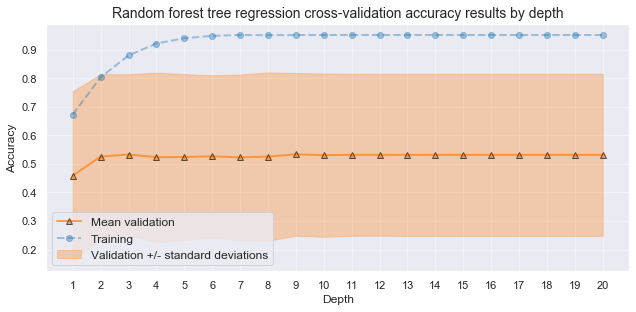

In [50]:
# set parameters for model fitting
depths = list(range(1, 21))
cv = 5
num_bootstraps=800

# perform CV and generate required results
cvmeans, cvstds, train_scores = calc_meanstd(X_train, y_train, depths, cv)

# convert results from lists to arrays for plotting function
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

# plot results
title = (
    "Random forest tree regression cross-validation accuracy results by "
    "depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)




In [51]:
# choose best depth
max_cvmeans=max(cvmeans)
best_cv_depth = list(cvmeans).index(max_cvmeans)+1
idx = list(cvmeans).index(max(cvmeans))

# summarize CV results at best depth
print(
    "Cross-validated validation accuracy for our chosen best "
    "depth of {} is:\n\n\tmean    \t{:.4f}"
    "\n\t+/-2 stdev\t[{:.4f}, {:.4f}]\n".format(
        best_cv_depth,
        cvmeans[idx],
        cvmeans[idx] - 2*cvstds[idx],
        cvmeans[idx] + 2*cvstds[idx],
    )
)


#Final model with tuned parameters:
max_depth = best_cv_depth

# Define the Bagging Regressor Model
model = RandomForestRegressor(n_estimators=num_bootstraps, max_features="sqrt", max_depth=max_depth, random_state=0)

# Fit the model on the train data
model_fit=model.fit(X_train, y_train)

best_cv_rf_train_score = model_fit.score(X_train, y_train)
best_cv_rf_test_score = model_fit.score(X_test, y_test)

# print model results summary
print(
    "The random forest decision tree regression of depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_rf_train_score,
        best_cv_rf_test_score,
    )
)

Cross-validated validation accuracy for our chosen best depth of 9 is:

	mean    	0.5332
	+/-2 stdev	[-0.0364, 1.1028]

The random forest decision tree regression of depth 9 trained on the full training set, achieves the following accuracy scores:

	train	0.9509
	TEST	0.7153


In [52]:
# fit random forest
rf = RandomForestRegressor(
    n_estimators=num_bootstraps, max_features="sqrt", max_depth=max_depth
)
fitted_rf=rf.fit(X_train,y_train)

# evaluate results
random_forest_train_score = fitted_rf.score(X_train, y_train)
random_forest_test_score = fitted_rf.score(X_test, y_test)

# print results summary
print(
    "The random forest of depth-{} and {} trees achieves the "
    "following accuracy scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        max_depth,
        num_bootstraps,
        random_forest_train_score,
        random_forest_test_score,
    )
)

The random forest of depth-9 and 800 trees achieves the following accuracy scores:

	train	0.9504
	TEST	0.7232


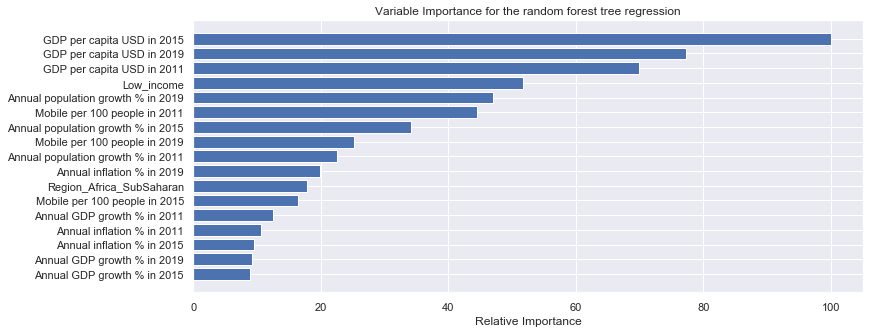

In [53]:
#Feature importance
feature_importance = fitted_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the random forest tree regression')
plt.show()

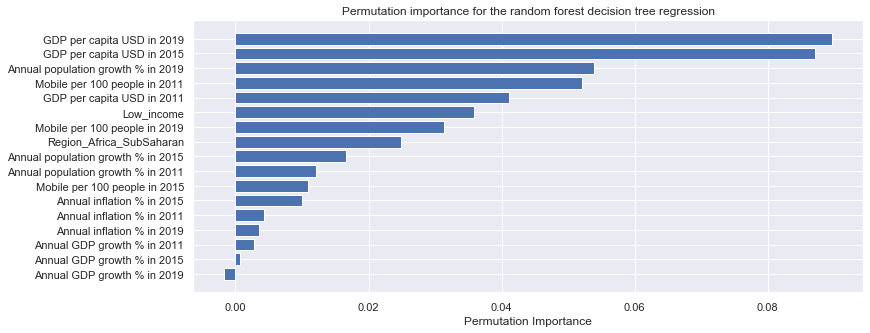

In [54]:

#Permutation
perm_importance = permutation_importance(fitted_rf, X_test, y_test)
perm = pd.DataFrame(perm_importance.importances_mean)
perm["names"]=list(X_train.columns)
perm.sort_values(0,inplace=True)

plt.figure(figsize=(12,5))
plt.barh(perm['names'], perm[0])
plt.xlabel("Permutation Importance")
plt.ylabel("")
plt.title("Permutation importance for the random forest decision tree regression")
plt.show()



In [55]:
#Model prediction for 2020

forest_2020=rf.predict(X_std_2020_df)
pred_dif_forest_2020=(np.mean(forest_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The forest prediction of primary education completion % in 2020 is {round(np.mean(forest_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_forest_2020,2)}%")


The actual value of primary education completion % in 2020 is 79.7745
The forest prediction of primary education completion % in 2020 is 79.6114
The mean difference between the actual data 2020 and the model prediction for 2020 is 2.56%


### 5.8 Adaboost regression (with depth tuned and optimal number of estimators)<a name="Adaboost"></a>


[Return to contents](#contents)  

In [56]:
# Set hyperparameters and fit AdaBoostregressor, default learning rate=1
max_depth = 3 #initial guess
n_estimators = 700 #initial guess

fitted_ada =AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth), n_estimators=n_estimators, 
                              random_state=0).fit(X_train,y_train)

# generate lists of staged scores at each iteration
train_scores = list(fitted_ada.staged_score(X_train, y_train))
test_scores = list(fitted_ada.staged_score(X_test, y_test))

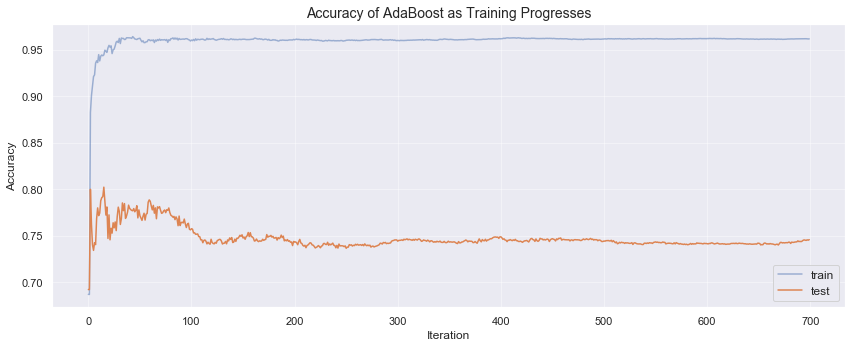

In [57]:
# Generate plot of accuracy as training progresses and select n_estimators
plt.figure(figsize=(12,5))
plt.plot(train_scores, "-", label='train', alpha=0.5)
plt.plot(test_scores, "-", label='test', alpha=1)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title(
    "Accuracy of AdaBoost as Training Progresses", fontsize=14
)
plt.legend(fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

**Findings**

Test accuracy stabilizes at n_estimators = 300. 

Therefore, n_estimators =300 will be used in the next Adaboost regressions.

In [58]:
# Tune depth of the Adaboost model
# Set hyperparameters and instantiate empty dictionaries, default learning rate=1, n_estimators =300
depths = [1, 2, 3, 4]
n_estimators = 300

train_scores = {}
test_scores = {}

# Fit regressors and generate staged scores at each depth
for max_depth in depths:
    fitted_ada = AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=max_depth),
        n_estimators=n_estimators).fit(X_train, y_train)
    
    train_scores[max_depth] = list(
        fitted_ada.staged_score(X_train, y_train)
    )
    test_scores[max_depth] = list(
        fitted_ada.staged_score(X_test, y_test)
    )

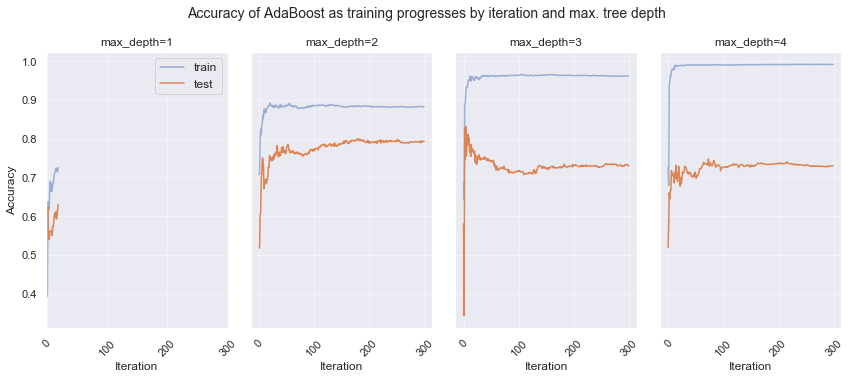

In [59]:
#Visualize results to tune depth

fig, axs = plt.subplots(1, 4, figsize=(12, 5), sharey=True)
for i, (ax, max_depth) in enumerate(zip(axs, depths)):
    ax.plot(train_scores[max_depth], "-", label="train", alpha=0.5)
    ax.plot(test_scores[max_depth], "-", label="test", alpha=1)
    ax.set_xticks(np.arange(0, n_estimators+1, 100))
    ax.set_xticklabels(np.arange(0, n_estimators+1, 100), rotation=45)
    ax.set_xlabel("Iteration", fontsize=12)
    ax.set_title(f"max_depth={max_depth}", fontsize=12)
    ax.grid(":", alpha=0.4)
    if i==0:
        ax.set_ylabel("Accuracy", fontsize=12)
        ax.legend(fontsize=12)
    
plt.suptitle(
    "Accuracy of AdaBoost as training progresses by iteration "
    "and max. tree depth",
    y=1.05,
    fontsize=14,
)
plt.tight_layout()
plt.show()

**Findings**

A model with depth 2 seems optimal (and n_estimators=300), as the training accuracy stabilizes.


In [60]:
#Final Adaboost model with tuned n_estimators=300 and max_depth=2
n_estimators=300
max_depth=2
regr_adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth), n_estimators=n_estimators, random_state=0)
fit_adaboost = regr_adaboost.fit(X_train,y_train)

# evaluate results
adaboost_train_score = fit_adaboost.score(X_train, y_train)
adaboost_test_score = fit_adaboost.score(X_test, y_test)

# print results summary
print(
    "The adaboost regression of depth of {} and {} trees achieves the "
    "following accuracy scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        max_depth,
        num_bootstraps,
        adaboost_train_score,
        adaboost_test_score,
    )
)


The adaboost regression of depth of 2 and 800 trees achieves the following accuracy scores:

	train	0.8847
	TEST	0.8080


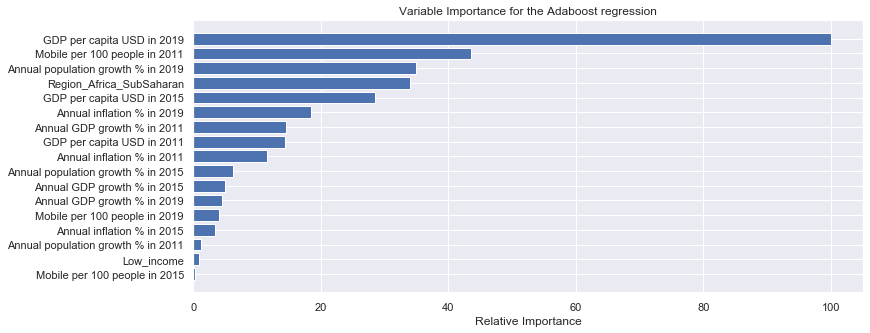

In [61]:
#Feature importance
feature_importance = fit_adaboost.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Adaboost regression')
plt.show()

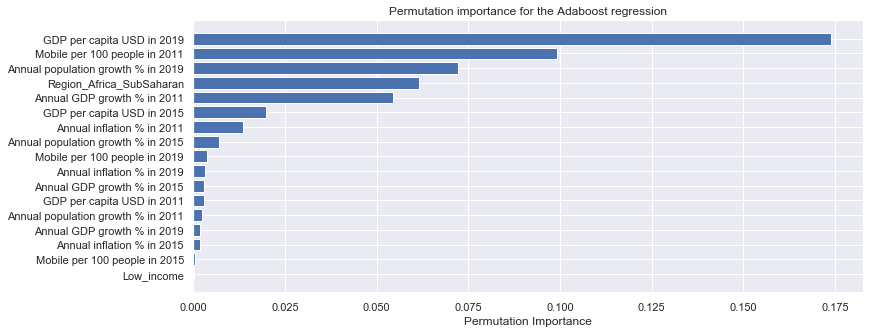

In [62]:
#Permutation
perm_importance = permutation_importance(fit_adaboost, X_test, y_test)
perm = pd.DataFrame(perm_importance.importances_mean)
perm["names"]=list(X_train.columns)
perm.sort_values(0,inplace=True)

plt.figure(figsize=(12,5))
plt.barh(perm['names'], perm[0])
plt.xlabel("Permutation Importance")
plt.ylabel("")
plt.title("Permutation importance for the Adaboost regression")
plt.show()



In [63]:
#Model prediction for 2020

ada_2020=fit_adaboost.predict(X_std_2020_df)
pred_dif_ada_2020=(np.mean(ada_2020/y_2020)-1)*100

#Prediction results for 2020
print(f"\nThe actual value of primary education completion % in 2020 is {round(np.mean(y_2020),4)}")
print(f"The adaboost prediction of primary education completion % in 2020 is {round(np.mean(ada_2020),4)}")
print(f"The mean difference between the actual data 2020 and the model prediction for 2020 is {round(pred_dif_ada_2020,2)}%")


The actual value of primary education completion % in 2020 is 79.7745
The adaboost prediction of primary education completion % in 2020 is 77.8177
The mean difference between the actual data 2020 and the model prediction for 2020 is -0.27%


<div class='exercise-r'>

### VI. Summary of results of the different models<a name="paragraph18"></a>
    
</div>


[Return to contents](#contents)  

In [64]:
# generate dataframe with summary results 

results_df = pd.DataFrame(
    [
        (
            f"(Standard) Linear",
            round(np.mean(y_2020),4),
            round(np.mean(linear_model_2020),4),
            round(pred_dif_linear_2020,2),
            round(linear_model_accu_train,4),
            round(linear_model_accu_test,4)
        ),
        (
            f"Lasso linear",
            round(np.mean(y_2020),4),
            round(np.mean(lasso_model_2020),4),
            round(pred_dif_lasso_2020,2),
            round(lasso_model_accu_train,4),
            round(lasso_model_accu_test,4)
        ),        
        (
            f"k-NN",
            round(np.mean(y_2020),4),
            round(np.mean(kNN_model_2020),4),
            round(pred_dif_kNN_2020,2),
            round(R2_train,4),
            round(R2_test,4)
        ),        
        (
            f"Single decision tree",
            round(np.mean(y_2020),4),
            round(np.mean(decision_tree_2020),4),
            round(pred_dif_tree_2020,2),
            round(best_cv_tree_train_score,4),
            round(best_cv_tree_test_score,4)
        ),
        (
            f"Bagging regression",
            round(np.mean(y_2020),4),
            round(np.mean(bagging_2020),4),
            round(pred_dif_bagging_2020,2),
            round(best_cv_bag_train_score,4),
            round(best_cv_bag_test_score,4)
        ),
        (
            f"Random forest",
            round(np.mean(y_2020),4),
            round(np.mean(forest_2020),4),
            round(pred_dif_forest_2020,2),
            round(random_forest_train_score,4),
            round(random_forest_test_score,4)
        ),
        (
            f"Adaboost",
            round(np.mean(y_2020),4),
            round(np.mean(ada_2020),4),
            round(pred_dif_ada_2020,2),
            round(adaboost_train_score,4),
            round(adaboost_test_score,4)
        )

    ], 
    columns=[
        "Regression", "Actual value", "Prediction", "Mean difference %", "Train accuracy", "Test accuracy"
    ]
).set_index("Regression")

# display results
results_df



,Actual value,Prediction,Mean difference %,Train accuracy,Test accuracy
Regression,,,,,
(Standard) Linear,79.7745,80.1050,2.94,0.8103,0.7190
Lasso linear,79.7745,80.1026,3.53,0.7850,0.7494
k-NN,79.7745,79.4850,2.74,0.7647,0.6982
Single decision tree,79.7745,80.8430,5.39,0.7587,0.6317
Bagging regression,79.7745,79.8637,3.03,0.8976,0.7115
Random forest,79.7745,79.6114,2.56,0.9504,0.7232
Adaboost,79.7745,77.8177,-0.27,0.8847,0.8080


**Conclusion about the results of the models**

Despite the small sample size after cleaning the data (83 countries), the test accuracy of all the models was medium to relatively high (between 0.63 to 0.81), while the difference between the predictions of the models for 2020 and the actual value of primary completion rate for 2020 was between -0.27 and 5.39 percent.

As expected, Adaboost provided the best test accuracy (0.81) in comparison to the other models (followed by the random forest, bagging, k-NN, and single decision tree). The difference between the prediction for 2020 of the Adaboost model and the actual 2020 value for primary completion rate was less than 1 percent (-0.27 percent), suggesting that the impact of Covid is (still) not evident for this educational indicator.

Importantly, the (standard and lasso) linear models also provided high test accuracies, but violated the homoskedasticity assumption, and therefore, they are not suitable for prediction.